# **Our Dataset Features**


- **Target: price price in US dollars (\$326--\$18,823)**

- **carat weight of the diamond (0.2--5.01)**

- **cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)**

- **color diamond color, from J (worst) to D (best)**

- **clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

- **x length in mm (0--10.74)**

- **y width in mm (0--58.9)**

- **z depth in mm (0--31.8)**

- **depth total depth percentage = z / mean(x, y) = 2 \* z / (x + y) (43--79)**

- **table width of the top of diamond relative to widest point (43--95)**


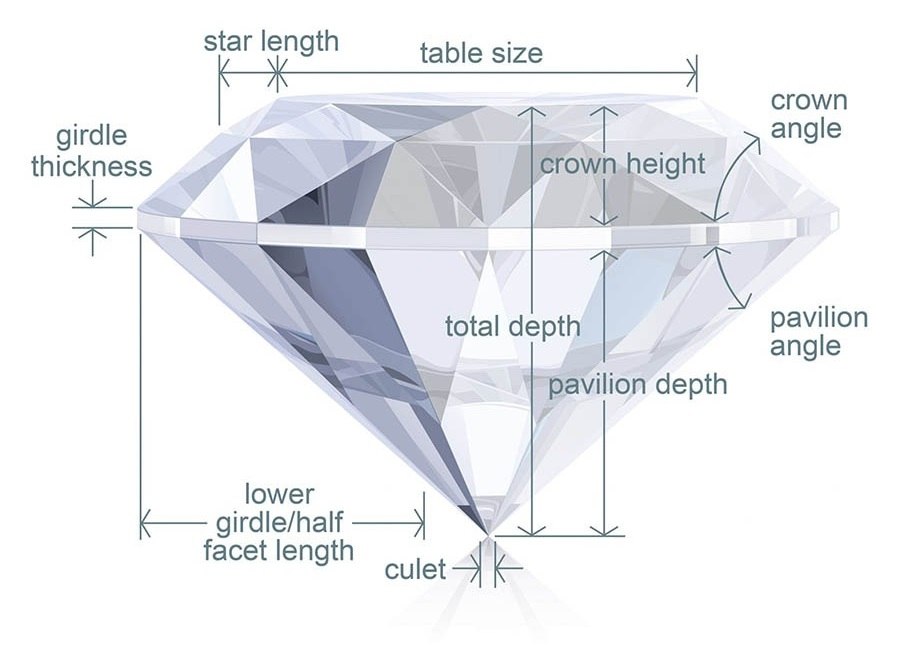


# **Reading Data**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import sklearn

In [4]:
csv_file_path = '/content/Datasets/train.csv'

df = pd.read_csv(csv_file_path)

df

Id  carat        cut color clarity  depth  table  price     x     y  \
0          1   1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60   
1          2   1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42   
2          3   0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41   
3          4   0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22   
4          5   0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
43147  43148   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18   
43148  43149   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73   
43149  43150   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87   
43150  43151   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43   
43151  43152   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46   

          z  
0      4.07  
1      4.51  
2      2.71  
3      3.19  
4      3.50  
...     ...  
43147  3.18  
43148  3.55  
43149  3.02  
43150  2.65  
43151  2.74  

[43152 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe().T

count          mean           std    min       25%       50%  \
Id     43152.0  21576.500000  12457.053745    1.0  10788.75  21576.50   
carat  43152.0      0.797855      0.473594    0.2      0.40      0.70   
depth  43152.0     61.747177      1.435454   43.0     61.00     61.80   
table  43152.0     57.458347      2.233904   43.0     56.00     57.00   
price  43152.0   3929.491912   3985.527795  326.0    947.75   2401.00   
x      43152.0      5.731568      1.121279    0.0      4.71      5.70   
y      43152.0      5.735018      1.148809    0.0      4.72      5.71   
z      43152.0      3.538568      0.708238    0.0      2.91      3.53   

            75%       max  
Id     32364.25  43152.00  
carat      1.04      5.01  
depth     62.50     79.00  
table     59.00     95.00  
price   5312.00  18823.00  
x          6.54     10.74  
y          6.54     58.90  
z          4.04     31.80

In [7]:
df.describe(exclude='number').T

count unique    top   freq
cut      43152      5  Ideal  17203
color    43152      7      G   9060
clarity  43152      8    SI1  10428

# **Intial Data Preparation**


In [8]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

- **No missing values will be bothering us in our data.**


In [9]:
df.drop(columns='Id', inplace=True)

In [10]:
df.duplicated().sum()

97

> **Dropping Duplicates**


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth%', 'z':'depth','table':'table_width'}, inplace=True)

df

carat        cut color clarity  depth%  table_width  price  length  \
0       1.06      Ideal     I     SI2    61.8         57.0   4270    6.57   
1       1.51    Premium     G    VVS2    60.9         58.0  15164    7.38   
2       0.32      Ideal     F     VS2    61.3         56.0    828    4.43   
3       0.53      Ideal     G     VS2    61.2         56.0   1577    5.19   
4       0.70    Premium     H    VVS2    61.0         57.0   2596    5.76   
...      ...        ...   ...     ...     ...          ...    ...     ...   
43147   0.52      Ideal     E     VS2    61.5         56.0   1760    5.16   
43148   0.72  Very Good     D     VS2    62.1         59.0   3016    5.70   
43149   0.44    Premium     I    VVS1    61.5         58.0    990    4.95   
43150   0.31    Premium     E     VS1    60.2         58.0    734    4.38   
43151   0.33      Ideal     G     VS2    61.2         55.0    743    4.49   

       width  depth  
0       6.60   4.07  
1       7.42   4.51  
2       4.41   2.71  
3       5.22   3.19  
4       5.72   3.50  
...      ...    ...  
43147   5.18   3.18  
43148   5.73   3.55  
43149   4.87   3.02  
43150   4.43   2.65  
43151   4.46   2.74  

[43055 rows x 10 columns]

## **Fixing Categorical Columns**


In [13]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']


df['cut'] = pd.Categorical(df['cut'], categories= cut_categories, ordered=True)


df['cut']

0            Ideal
1          Premium
2            Ideal
3            Ideal
4          Premium
           ...    
43147        Ideal
43148    Very Good
43149      Premium
43150      Premium
43151        Ideal
Name: cut, Length: 43055, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [14]:
color_categories = sorted(df['color'].value_counts().index, reverse=True)

df['color'] = pd.Categorical(df['color'], categories= color_categories, ordered=True)

df['color']

0        I
1        G
2        F
3        G
4        H
        ..
43147    E
43148    D
43149    I
43150    E
43151    G
Name: color, Length: 43055, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [15]:
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['clarity'] = pd.Categorical(df['clarity'], categories= clarity_categories, ordered=True)

df['clarity']

0         SI2
1        VVS2
2         VS2
3         VS2
4        VVS2
         ... 
43147     VS2
43148     VS2
43149    VVS1
43150     VS1
43151     VS2
Name: clarity, Length: 43055, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

**Let's make new encoded features from our categories**


In [16]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ['cut','color','clarity']

cat_orders = [cut_categories, color_categories, clarity_categories]

encoder = OrdinalEncoder(categories=cat_orders)

cats_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns = ['cut_encoded','color_encoded','clarity_encoded'])

cats_encoded

cut_encoded  color_encoded  clarity_encoded
0              4.0            1.0              1.0
1              3.0            3.0              5.0
2              4.0            4.0              3.0
3              4.0            3.0              3.0
4              3.0            2.0              5.0
...            ...            ...              ...
43050          4.0            5.0              3.0
43051          2.0            6.0              3.0
43052          3.0            1.0              6.0
43053          3.0            5.0              4.0
43054          4.0            3.0              3.0

[43055 rows x 3 columns]

In [17]:
df_encoded = df.drop(columns=['cut','color','clarity']).copy()

df_encoded['cut_encoded'] = df['cut'].cat.codes
df_encoded['color_encoded'] = df['color'].cat.codes
df_encoded['clarity_encoded'] = df['clarity'].cat.codes

In [18]:
print(df_encoded['cut_encoded'].value_counts(), '\n')
print(cats_encoded['cut_encoded'].value_counts(), '\n')
print(df['cut'].value_counts(), '\n')

4    17161
3    11080
2     9651
1     3874
0     1289
Name: cut_encoded, dtype: int64 

4.0    17161
3.0    11080
2.0     9651
1.0     3874
0.0     1289
Name: cut_encoded, dtype: int64 

Ideal        17161
Premium      11080
Very Good     9651
Good          3874
Fair          1289
Name: cut, dtype: int64 



In [19]:
print(df_encoded['color_encoded'].value_counts(), '\n')
print(cats_encoded['color_encoded'].value_counts(), '\n')
print(df['color'].value_counts(), '\n')

3    9042
5    7817
4    7616
2    6629
6    5411
1    4254
0    2286
Name: color_encoded, dtype: int64 

3.0    9042
5.0    7817
4.0    7616
2.0    6629
6.0    5411
1.0    4254
0.0    2286
Name: color_encoded, dtype: int64 

G    9042
E    7817
F    7616
H    6629
D    5411
I    4254
J    2286
Name: color, dtype: int64 



In [20]:
print(df_encoded['clarity_encoded'].value_counts(), '\n')
print(cats_encoded['clarity_encoded'].value_counts(), '\n')
print(df['clarity'].value_counts(), '\n')

2    10406
3     9806
1     7403
4     6465
5     4031
6     2899
7     1440
0      605
Name: clarity_encoded, dtype: int64 

2.0    10406
3.0     9806
1.0     7403
4.0     6465
5.0     4031
6.0     2899
7.0     1440
0.0      605
Name: clarity_encoded, dtype: int64 

SI1     10406
VS2      9806
SI2      7403
VS1      6465
VVS2     4031
VVS1     2899
IF       1440
I1        605
Name: clarity, dtype: int64 



- **We can notice that the `OrdinalEncoder` did the same job as `.cat.codes` function, this will help us makeing the piplines.**


## **Creating New Volume Feature**


- **We will make a `Volume` Feature which is the product of `width * lenght * depth `**


In [21]:
df['volume'] = df['depth'] * df['width'] * df['depth']

df

carat        cut color clarity  depth%  table_width  price  length  \
0       1.06      Ideal     I     SI2    61.8         57.0   4270    6.57   
1       1.51    Premium     G    VVS2    60.9         58.0  15164    7.38   
2       0.32      Ideal     F     VS2    61.3         56.0    828    4.43   
3       0.53      Ideal     G     VS2    61.2         56.0   1577    5.19   
4       0.70    Premium     H    VVS2    61.0         57.0   2596    5.76   
...      ...        ...   ...     ...     ...          ...    ...     ...   
43147   0.52      Ideal     E     VS2    61.5         56.0   1760    5.16   
43148   0.72  Very Good     D     VS2    62.1         59.0   3016    5.70   
43149   0.44    Premium     I    VVS1    61.5         58.0    990    4.95   
43150   0.31    Premium     E     VS1    60.2         58.0    734    4.38   
43151   0.33      Ideal     G     VS2    61.2         55.0    743    4.49   

       width  depth      volume  
0       6.60   4.07  109.328340  
1       7.42   4.51  150.923542  
2       4.41   2.71   32.387481  
3       5.22   3.19   53.119242  
4       5.72   3.50   70.070000  
...      ...    ...         ...  
43147   5.18   3.18   52.382232  
43148   5.73   3.55   72.212325  
43149   4.87   3.02   44.416348  
43150   4.43   2.65   31.109675  
43151   4.46   2.74   33.483896  

[43055 rows x 11 columns]

In [22]:
df_encoded['volume'] = df['volume']

df_encoded

carat  depth%  table_width  price  length  width  depth  cut_encoded  \
0       1.06    61.8         57.0   4270    6.57   6.60   4.07            4   
1       1.51    60.9         58.0  15164    7.38   7.42   4.51            3   
2       0.32    61.3         56.0    828    4.43   4.41   2.71            4   
3       0.53    61.2         56.0   1577    5.19   5.22   3.19            4   
4       0.70    61.0         57.0   2596    5.76   5.72   3.50            3   
...      ...     ...          ...    ...     ...    ...    ...          ...   
43147   0.52    61.5         56.0   1760    5.16   5.18   3.18            4   
43148   0.72    62.1         59.0   3016    5.70   5.73   3.55            2   
43149   0.44    61.5         58.0    990    4.95   4.87   3.02            3   
43150   0.31    60.2         58.0    734    4.38   4.43   2.65            3   
43151   0.33    61.2         55.0    743    4.49   4.46   2.74            4   

       color_encoded  clarity_encoded      volume  
0                  1                1  109.328340  
1                  3                5  150.923542  
2                  4                3   32.387481  
3                  3                3   53.119242  
4                  2                5   70.070000  
...              ...              ...         ...  
43147              5                3   52.382232  
43148              6                3   72.212325  
43149              1                6   44.416348  
43150              5                4   31.109675  
43151              3                3   33.483896  

[43055 rows x 11 columns]

In [23]:
df.describe().T

count         mean          std    min         25%  \
carat        43055.0     0.797752     0.473198    0.2    0.400000   
depth%       43055.0    61.746373     1.435066   43.0   61.000000   
table_width  43055.0    57.459798     2.234325   43.0   56.000000   
price        43055.0  3930.016235  3984.939986  326.0  948.000000   
length       43055.0     5.731555     1.120732    0.0    4.710000   
width        43055.0     5.735063     1.148389    0.0    4.720000   
depth        43055.0     3.538528     0.707922    0.0    2.910000   
volume       43055.0    80.324174    56.329628    0.0   40.177332   

                     50%          75%        max  
carat           0.700000     1.040000      5.010  
depth%         61.800000    62.500000     79.000  
table_width    57.000000    59.000000     95.000  
price        2401.000000  5312.500000  18823.000  
length          5.700000     6.540000     10.740  
width           5.710000     6.540000     58.900  
depth           3.530000     4.040000     31.800  
volume         71.098896   105.401071   5207.886

# **Exploratory Data Analysis**


## **Univariate Analysis**


**Let's Check the Distributions of Our Features**


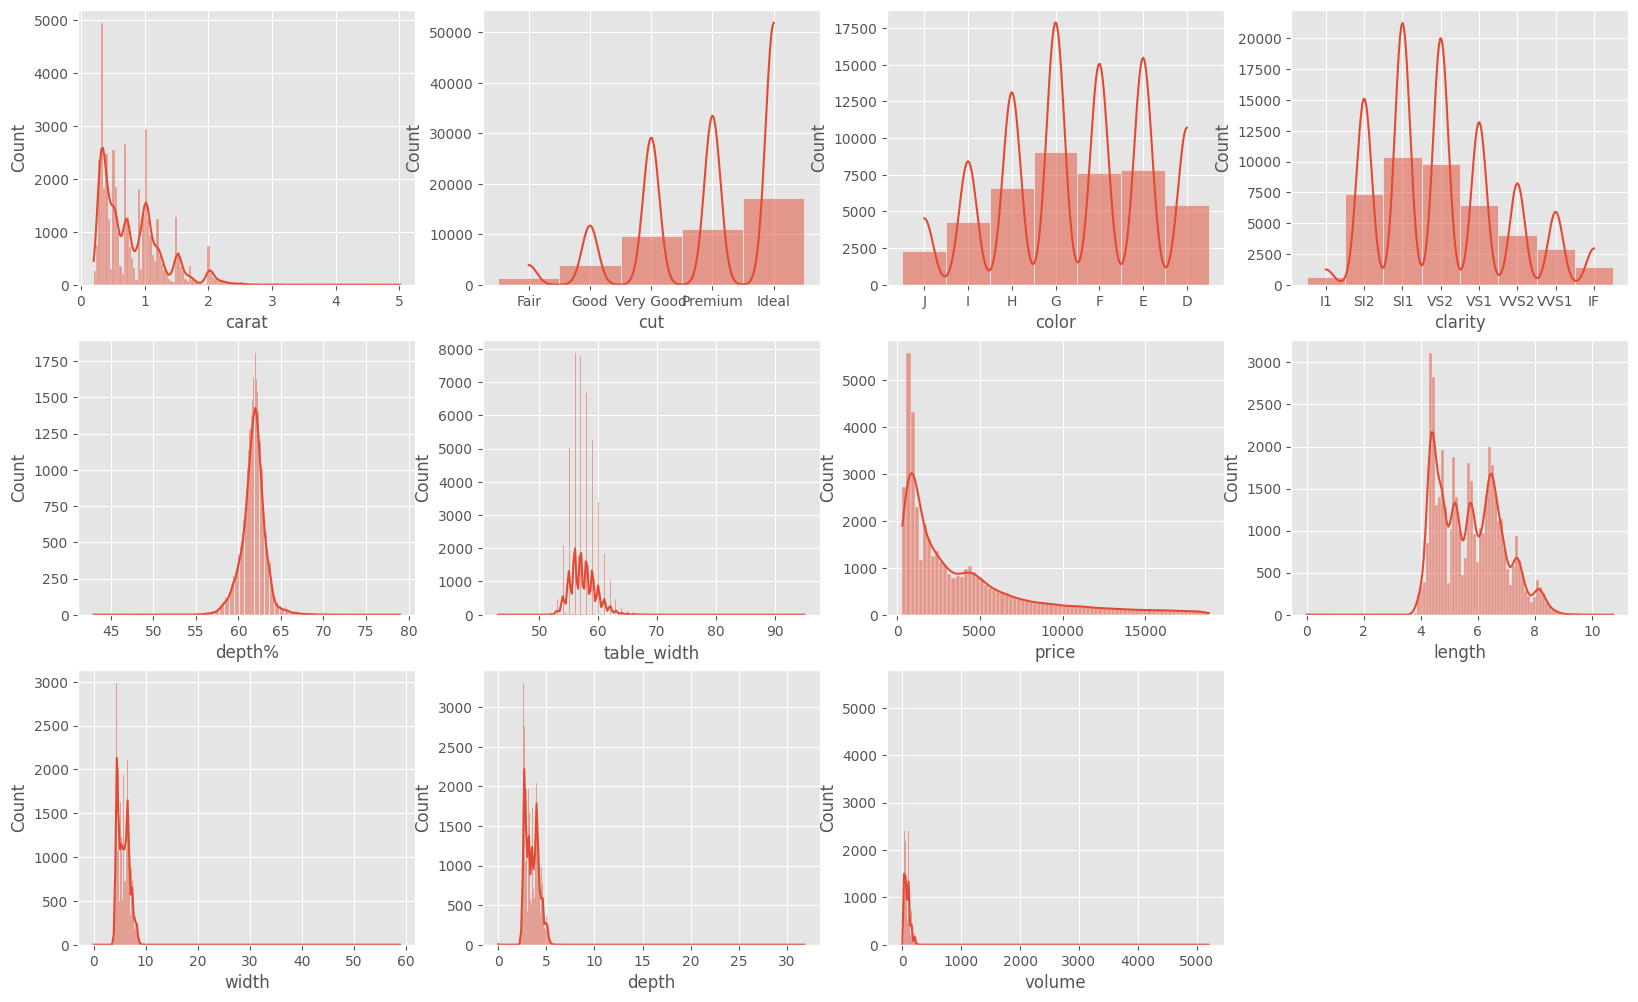

In [ ]:
plt.figure(figsize=(20,25))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 4, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

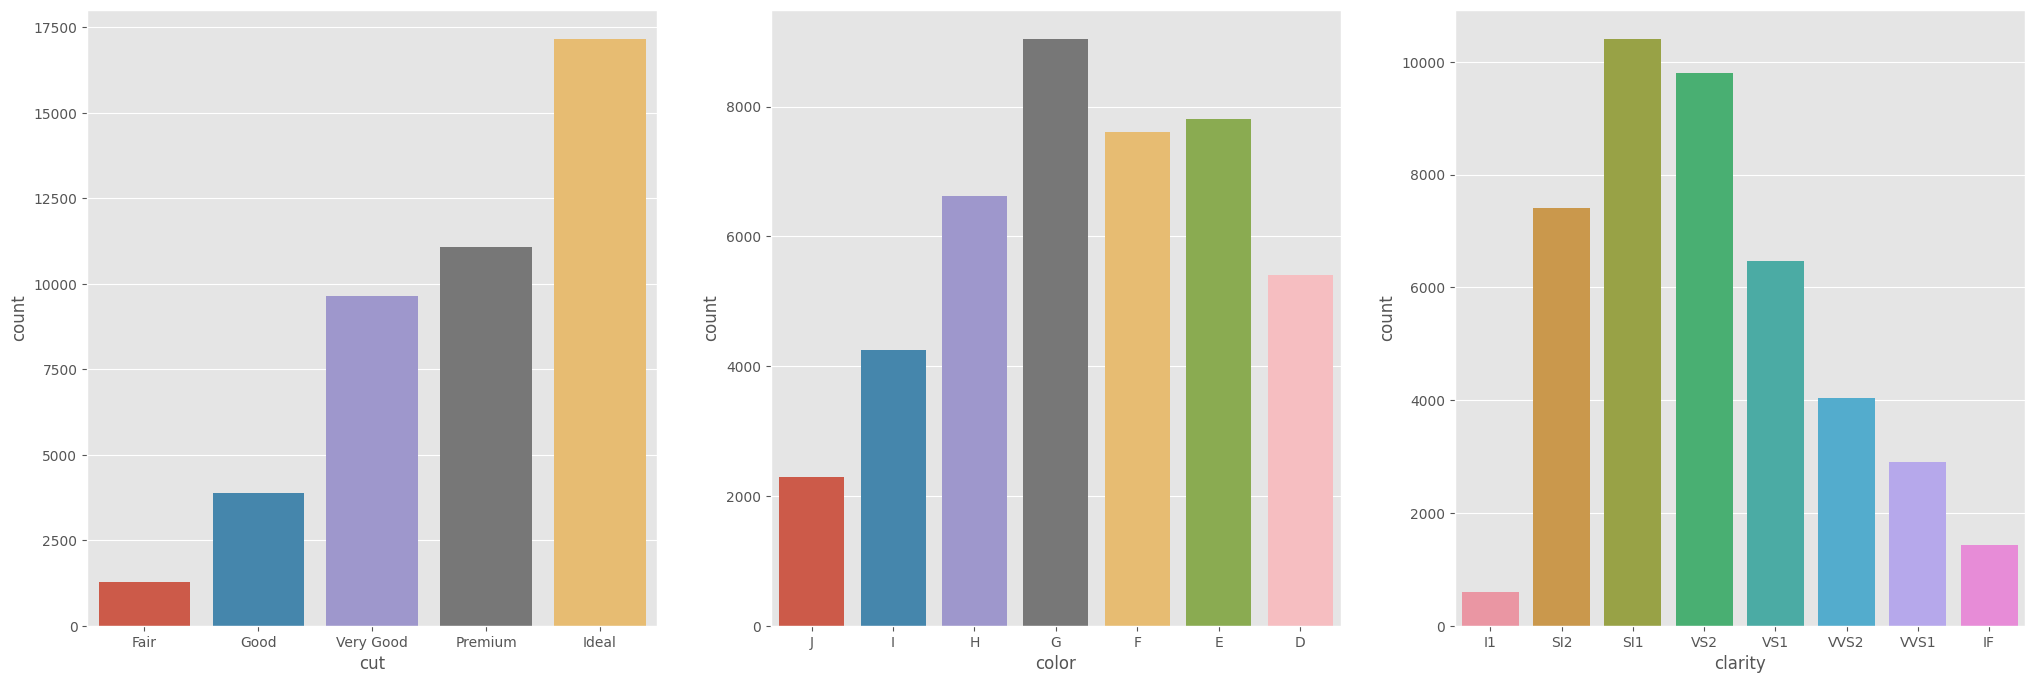

In [ ]:
plt.figure(figsize=(25,8))

for i, col in enumerate(df.select_dtypes(include='category').columns):

        ax = plt.subplot(1, 3, i+1)

        sns.countplot(x = df[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

- **We could divide our features to 3 groups:**
- **Features that are normally(or almost) distributed: `['depth','lenght']`**

- **Positvely Right Skewed Features (near zero values) that can be transformed: `['carat','table_width','price','width','depth','volume']`**

- **Ordinal Categorical Features that we encoded: `['cut','color','clarity']`**


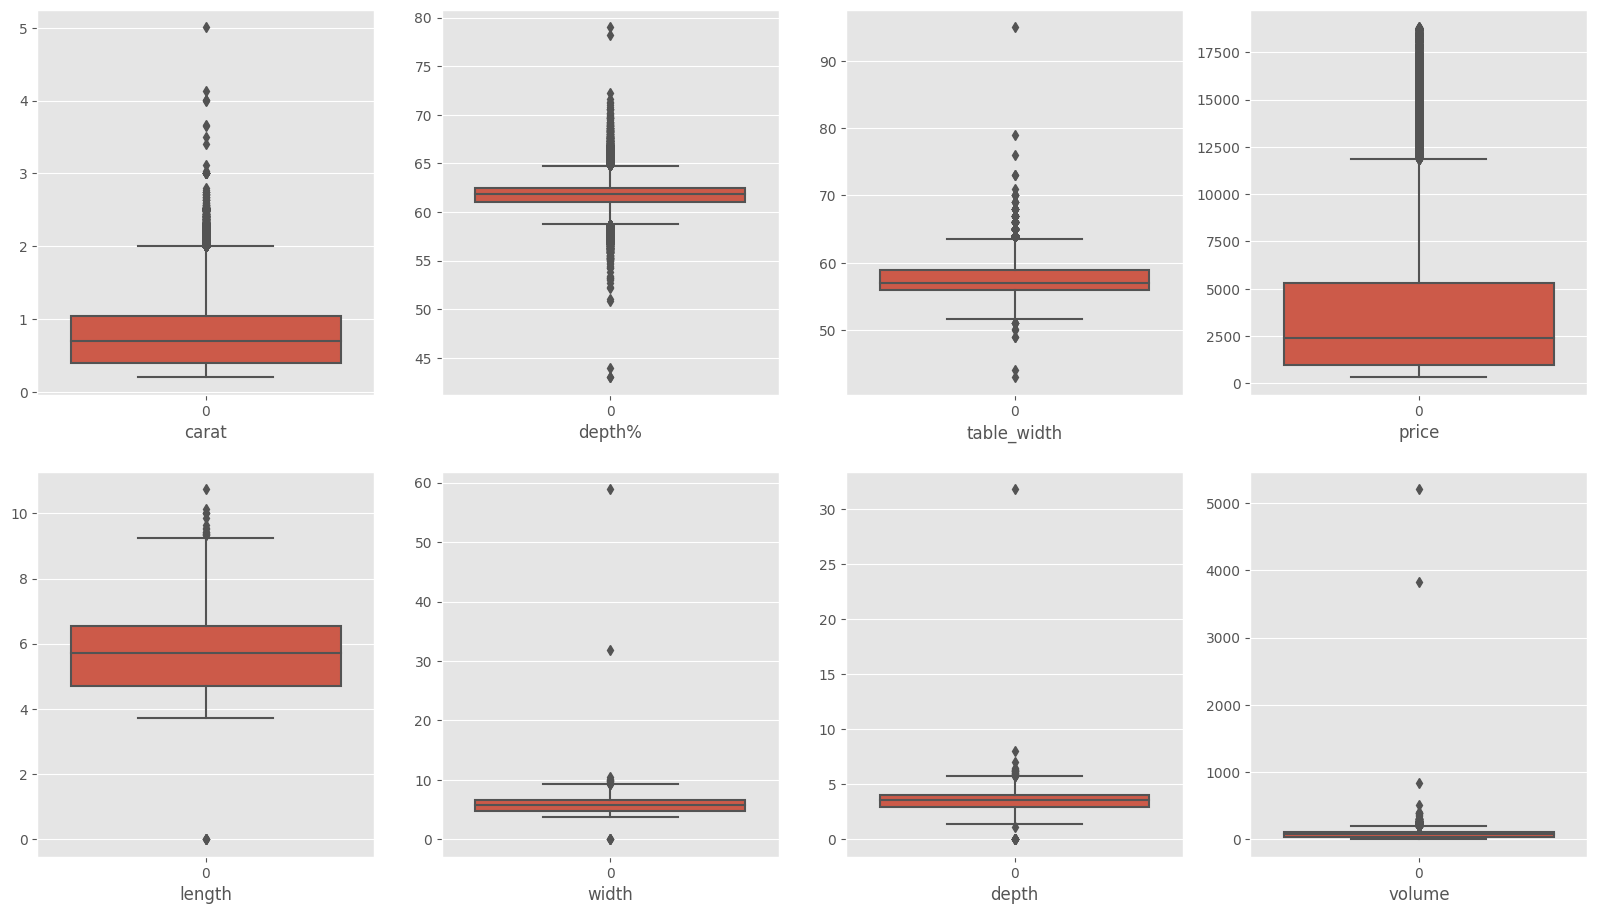

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.select_dtypes(exclude='category').columns):

        ax = plt.subplot(6, 4, i+1)

        sns.boxplot(df[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

In [ ]:
pd.DataFrame([df.select_dtypes(exclude='category').skew(),df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat    depth%  table_width     price    length       width  \
Skewness  1.108252 -0.158982     0.804203  1.616706  0.379844    2.914941   
Kurtosis  1.215953  5.805086     3.132748  2.169816 -0.642321  111.923528   

              depth       volume  
Skewness   1.799289    25.048478  
Kurtosis  58.377485  2049.093669

- **We may want to look at outliers in the `['width','depth','table_width','depth%','volume']` features by removing or imputing them.**


## **Multivariate Analysis**


**Now Let's look at the Correlation of the Features**


<Axes: >

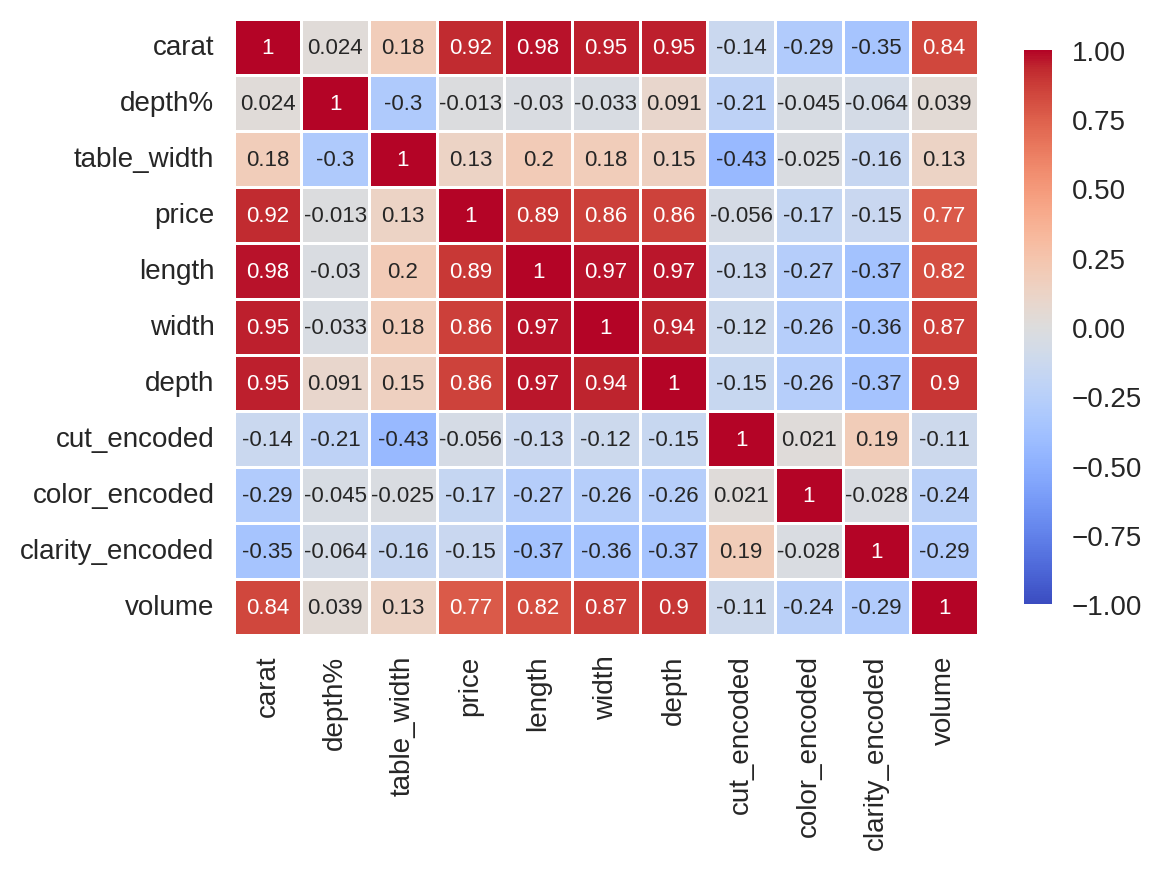

In [ ]:
plt.figure(figsize=(6, 4), dpi= 200)
sns.heatmap( df_encoded.corr(numeric_only=True), annot=True, cmap = sns.color_palette("coolwarm", as_cmap=True),
           linewidths= 1, vmin=-1, vmax=1, cbar_kws={"shrink": .9}, annot_kws={"size":8})

<Axes: >

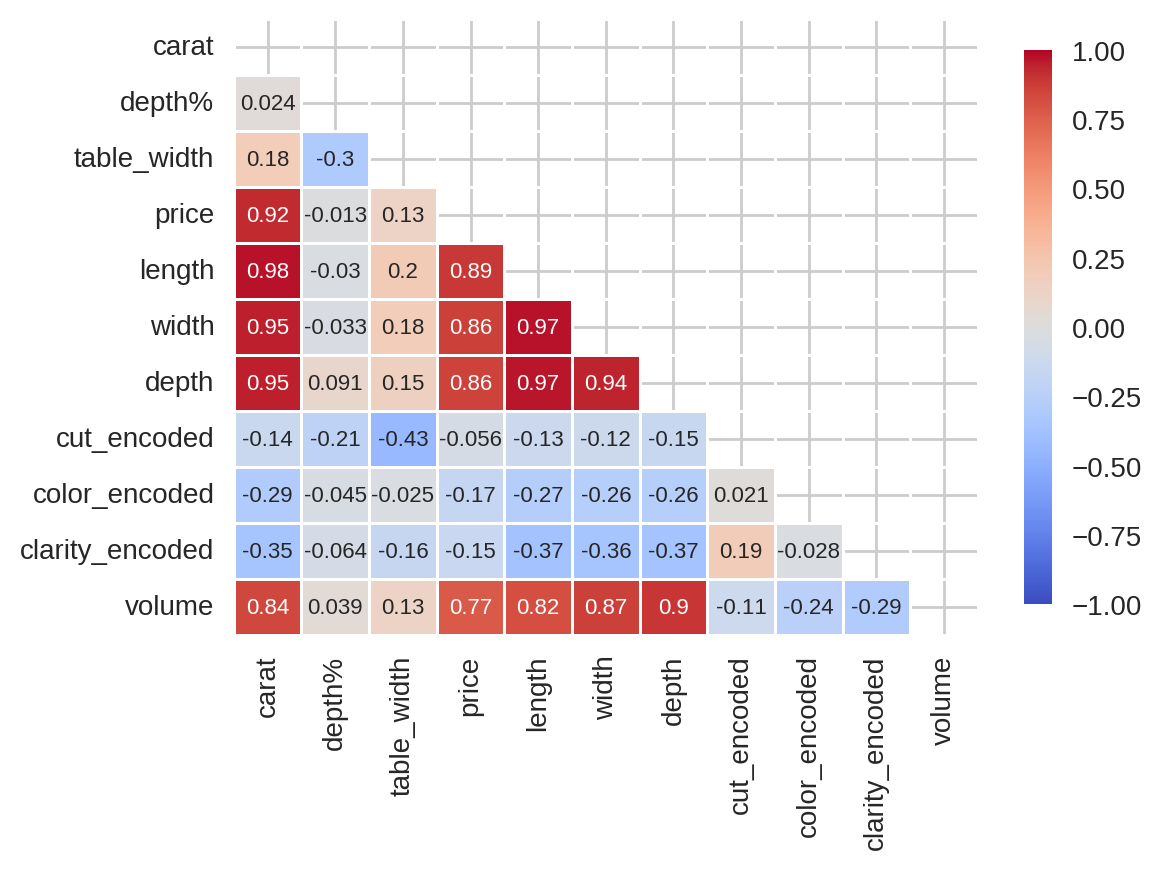

In [ ]:
plt.figure(figsize=(6, 4), dpi= 200)
mask = np.triu(np.ones_like(df_encoded.corr(numeric_only=True), dtype=bool))
sns.heatmap( df_encoded.corr(numeric_only=True), annot=True, mask=mask ,cmap = sns.color_palette("coolwarm", as_cmap=True),
           linewidths= 1, vmin=-1, vmax=1, cbar_kws={"shrink": .9}, annot_kws={"size":8})

<Figure size 2500x800 with 0 Axes>

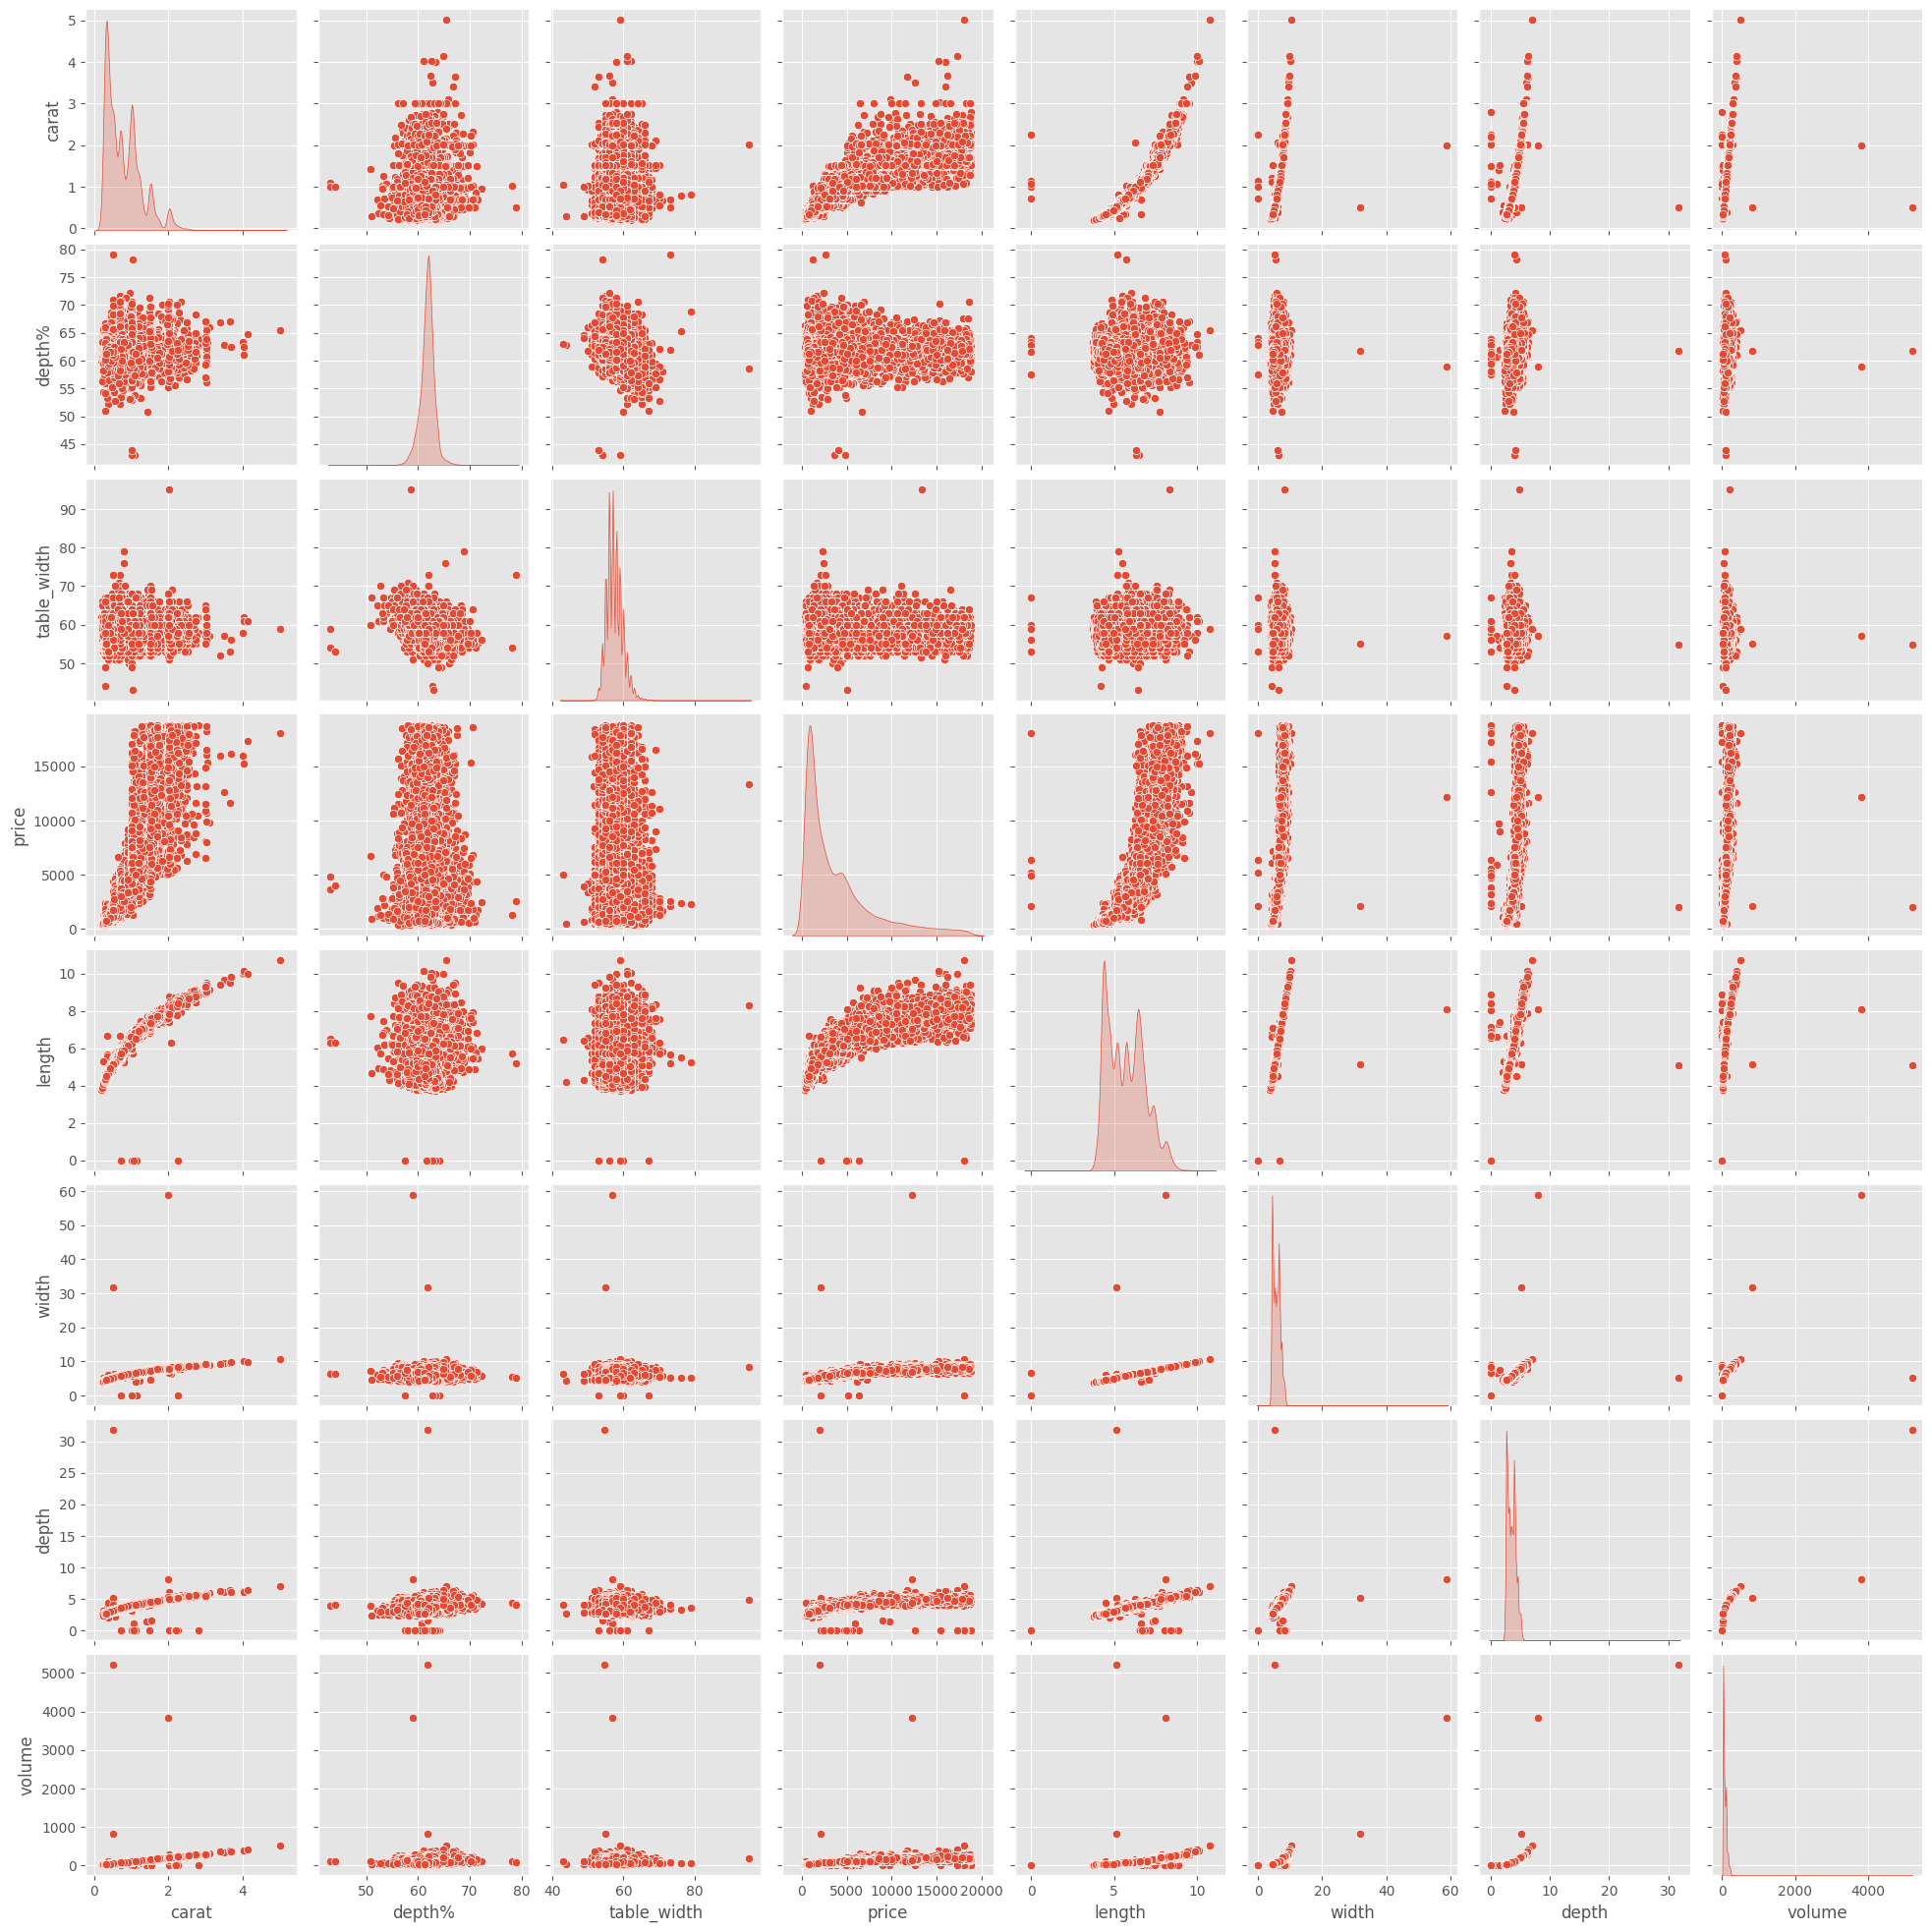

In [ ]:
plt.figure(figsize=(25,8))

sns.pairplot(df , diag_kind="kde")

- **We can see that our price target feature is highly correlated to `['lenght','width','depth','volume']` and most to `carat` features.**

- **And `carat` features being also high correlated to the `['lenght','width','depth']` features.**

- **Seems like `['lenght','width','depth']` features can be dropped since they are highly correlated to each other and to the `carat` feature.**

- **Finally, Our encoded categorical features have nealry negative linear relation to our price target and most features.**


## **Price Target Feature Analysis**


In [ ]:
fig1 = px.histogram(df, x='cut', y='price', title=" Total Price of Cut Categories", height=400)
fig2 = px.histogram(df, x='clarity',y='price', barmode='group',title="Total Price of Clarity Categoreis", height=400)
fig3 = px.histogram(df, x='color',y='price', barmode='group',title="Total Price of Clarity Categoreis", height=400)

fig1.show()
fig2.show()
fig3.show()

- **The highest cut `Ideal` have the most prices in the data.**

- **But the highest clarity `IF` have small sum of prices due to it's small portion in data.**

- **And also the Best color `D` have small sum of prices compared to `G` color.**


In [ ]:
px.histogram(df, x='cut',y='price',color='color', barmode='group',title="Total Price of Cut Colors")

- **Although J is the Best Color, G is having most high prices along the cuts.**


In [ ]:
px.histogram(df, x='clarity',y='price',color='color', barmode='group',title="Total Price of Clarity Color")

- **Also here, the Best Clarity `IF` have small prices due to it's small portion, and Interstingly not only `G` has the most prices among clarities also `H` has similar high prices.**


<Figure size 2500x1000 with 0 Axes>

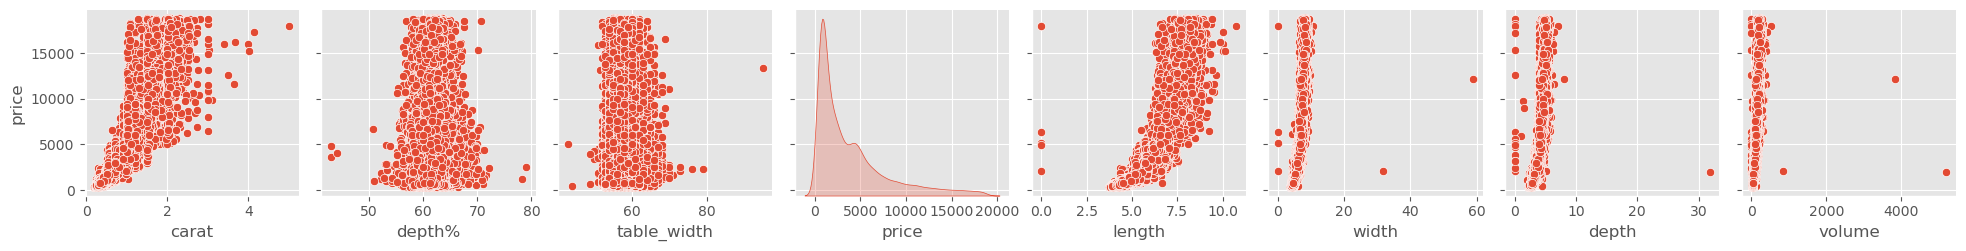

In [ ]:
plt.figure(figsize=(25,10))

sns.pairplot(df , diag_kind="kde", y_vars='price')

- **We can see that our assumptions about the correlation between the price features and `['cut','lenght','width','depth']` are correct they are clearly linearly correlated.**


### **MI Scores**


> **Let's calculate MI scores to detect non-linear relationships, Unlike correlation that can only detect linear relationships.**


In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df_encoded.copy()
y = X.pop("price")

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [ ]:
MI_Score = pd.DataFrame(mi_scores)
MI_Score.style.background_gradient(cmap='YlOrRd',axis=0)

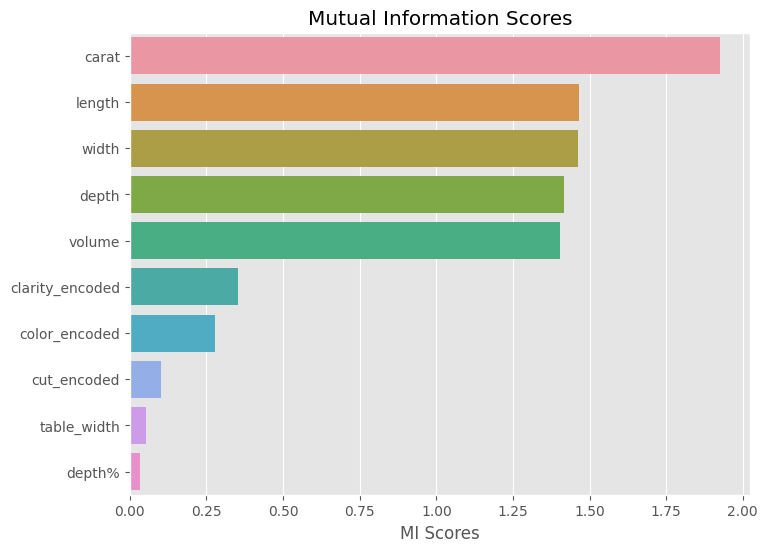

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    sns.barplot(x = scores, y = scores.index)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 6))
plot_mi_scores(mi_scores)

- **There are also non-linear relation between the price features and `['carat','lenght','width','depth','volume']` and not only linear.**

- **And Interstengily, Our encoded categorical features seems to have a non linear relation with our target.**

# **Data Preprocessing**


## **Removing Outliers**


In [24]:
df_encoded.describe().T

count         mean          std    min         25%  \
carat            43055.0     0.797752     0.473198    0.2    0.400000   
depth%           43055.0    61.746373     1.435066   43.0   61.000000   
table_width      43055.0    57.459798     2.234325   43.0   56.000000   
price            43055.0  3930.016235  3984.939986  326.0  948.000000   
length           43055.0     5.731555     1.120732    0.0    4.710000   
width            43055.0     5.735063     1.148389    0.0    4.720000   
depth            43055.0     3.538528     0.707922    0.0    2.910000   
cut_encoded      43055.0     2.904657     1.114915    0.0    2.000000   
color_encoded    43055.0     3.406178     1.701862    0.0    2.000000   
clarity_encoded  43055.0     3.045453     1.649152    0.0    2.000000   
volume           43055.0    80.324174    56.329628    0.0   40.177332   

                         50%          75%        max  
carat               0.700000     1.040000      5.010  
depth%             61.800000    62.500000     79.000  
table_width        57.000000    59.000000     95.000  
price            2401.000000  5312.500000  18823.000  
length              5.700000     6.540000     10.740  
width               5.710000     6.540000     58.900  
depth               3.530000     4.040000     31.800  
cut_encoded         3.000000     4.000000      4.000  
color_encoded       3.000000     5.000000      6.000  
clarity_encoded     3.000000     4.000000      7.000  
volume             71.098896   105.401071   5207.886

In [25]:
pd.DataFrame([df_encoded.select_dtypes(exclude='category').skew(),df_encoded.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat    depth%  table_width     price    length       width  \
Skewness  1.108252 -0.158982     0.804203  1.616706  0.379844    2.914941   
Kurtosis  1.215953  5.805086     3.132748  2.169816 -0.642321  111.923528   

              depth  cut_encoded  color_encoded  clarity_encoded       volume  
Skewness   1.799289    -0.719688      -0.193058         0.555213    25.048478  
Kurtosis  58.377485    -0.385666      -0.860217        -0.389368  2049.093669

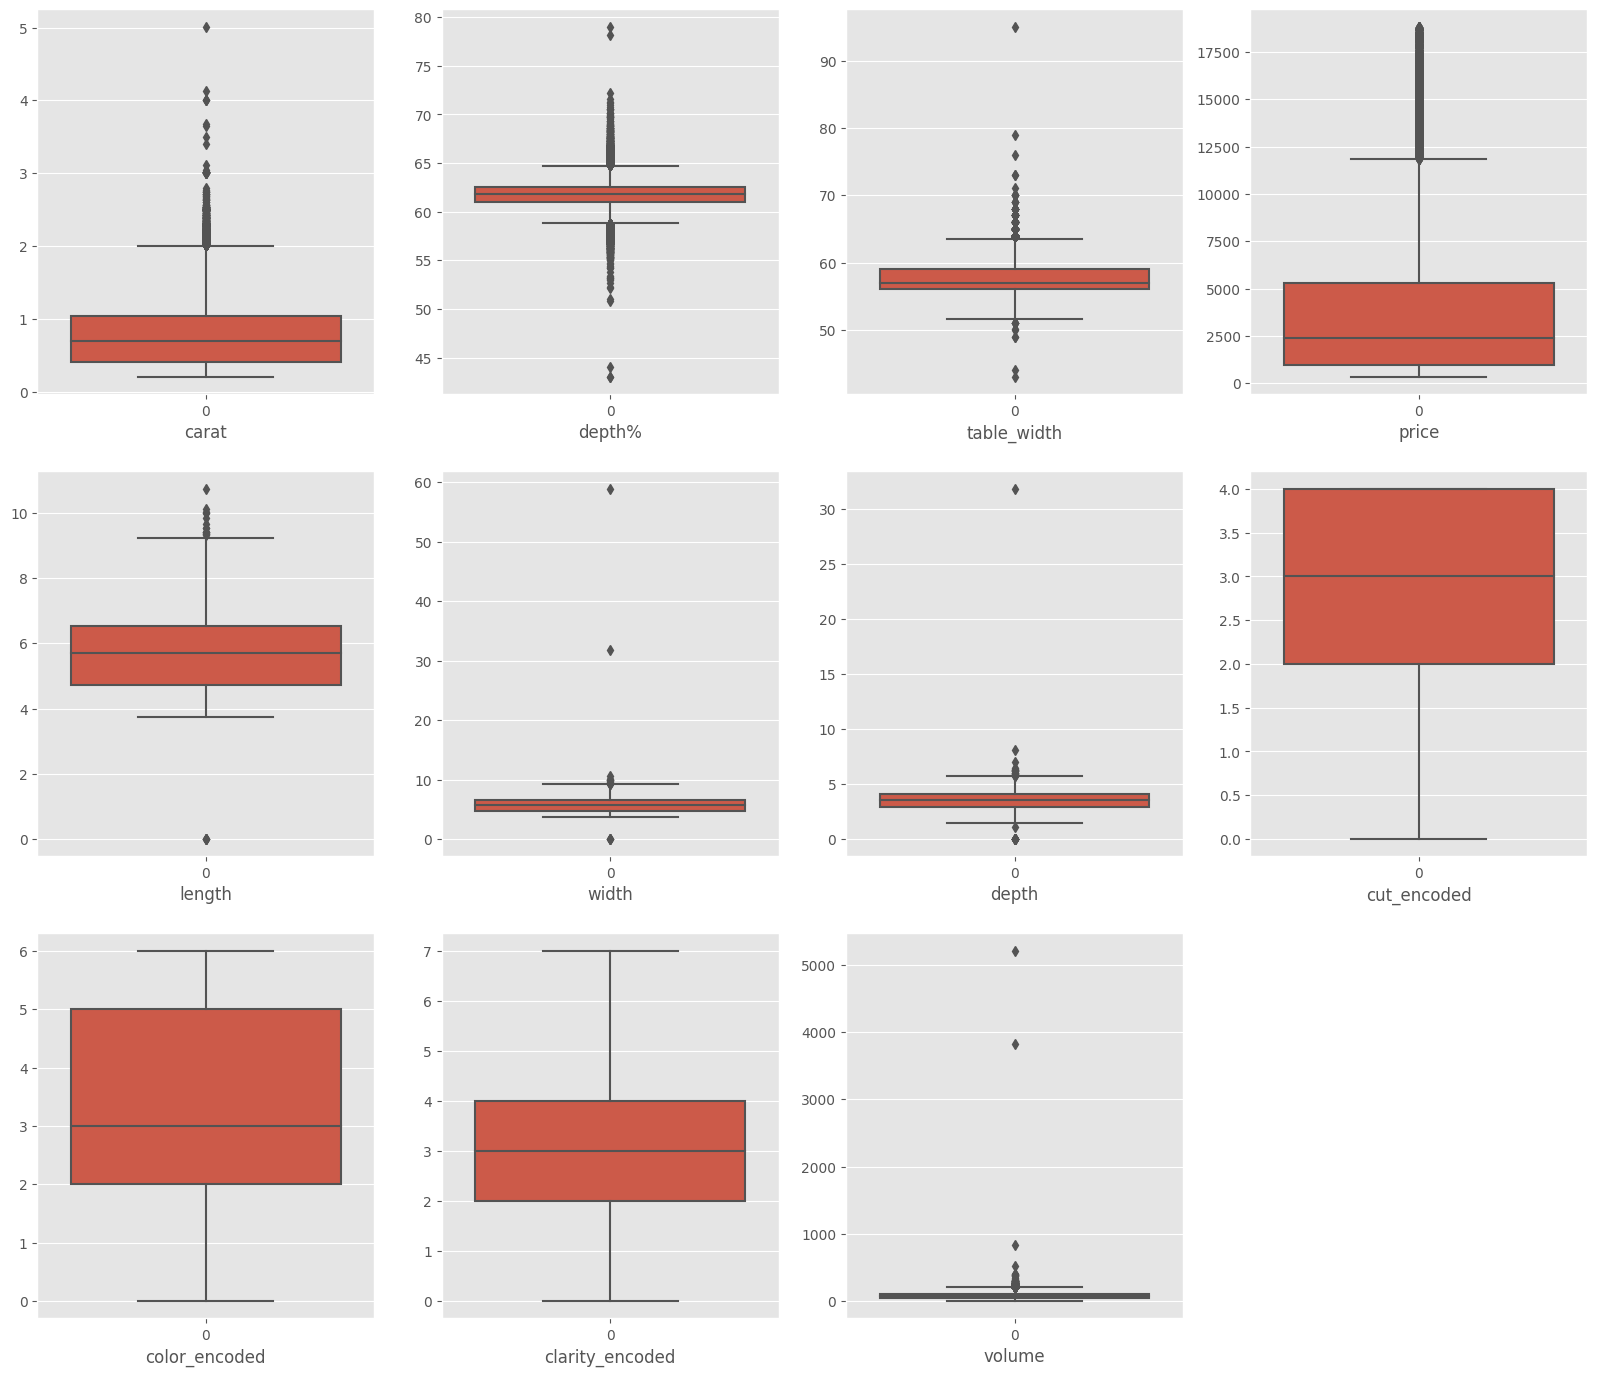

In [26]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df_encoded.columns):

        ax = plt.subplot(6, 4, i+1)

        sns.boxplot(df_encoded[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

> **As we said `['width','depth','table_width','depth%','volume']` features have outliers that we need to handle.**


- **We will not remove the outliers rows but we will set it first to be NaNs then Impute them.**


In [27]:
clean_df = df_encoded.copy()

outliers_cols = ['width','depth','table_width','depth%','volume']

# setting values that above or lower than the whiskers in the box plot to NaNs
for col in outliers_cols:

    data = clean_df[col]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    outliers = ( (data < min) | (data > max) )

    clean_df.loc[outliers, col] = np.nan
    
clean_df.isna().sum()

carat                 0
depth%             2044
table_width         472
price                 0
length                0
width                19
depth                39
cut_encoded           0
color_encoded         0
clarity_encoded       0
volume             1072
dtype: int64

In [28]:
clean_df

carat  depth%  table_width  price  length  width  depth  cut_encoded  \
0       1.06    61.8         57.0   4270    6.57   6.60   4.07            4   
1       1.51    60.9         58.0  15164    7.38   7.42   4.51            3   
2       0.32    61.3         56.0    828    4.43   4.41   2.71            4   
3       0.53    61.2         56.0   1577    5.19   5.22   3.19            4   
4       0.70    61.0         57.0   2596    5.76   5.72   3.50            3   
...      ...     ...          ...    ...     ...    ...    ...          ...   
43147   0.52    61.5         56.0   1760    5.16   5.18   3.18            4   
43148   0.72    62.1         59.0   3016    5.70   5.73   3.55            2   
43149   0.44    61.5         58.0    990    4.95   4.87   3.02            3   
43150   0.31    60.2         58.0    734    4.38   4.43   2.65            3   
43151   0.33    61.2         55.0    743    4.49   4.46   2.74            4   

       color_encoded  clarity_encoded      volume  
0                  1                1  109.328340  
1                  3                5  150.923542  
2                  4                3   32.387481  
3                  3                3   53.119242  
4                  2                5   70.070000  
...              ...              ...         ...  
43147              5                3   52.382232  
43148              6                3   72.212325  
43149              1                6   44.416348  
43150              5                4   31.109675  
43151              3                3   33.483896  

[43055 rows x 11 columns]

- **We will Impute the NaN values using `IterativeImputer`**

- **It trains a regression model per feature to predict the missing values based on all the other available features.**


In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=50)

clean_df = pd.DataFrame(imputer.fit_transform(clean_df), columns=clean_df.columns, index=clean_df.index)

clean_df.isna().sum()

carat              0
depth%             0
table_width        0
price              0
length             0
width              0
depth              0
cut_encoded        0
color_encoded      0
clarity_encoded    0
volume             0
dtype: int64

In [30]:
clean_df.describe().T

count         mean          std         min         25%  \
carat            43055.0     0.797752     0.473198    0.200000    0.400000   
depth%           43055.0    61.756775     1.370869   46.194955   61.000000   
table_width      43055.0    57.417492     2.106953   51.600000   56.000000   
price            43055.0  3930.016235  3984.939986  326.000000  948.000000   
length           43055.0     5.731555     1.120732    0.000000    4.710000   
width            43055.0     5.733347     1.112341    0.194293    4.720000   
depth            43055.0     3.538506     0.691900   -1.748043    2.910000   
cut_encoded      43055.0     2.904657     1.114915    0.000000    2.000000   
color_encoded    43055.0     3.406178     1.701862    0.000000    2.000000   
clarity_encoded  43055.0     3.045453     1.649152    0.000000    2.000000   
volume           43055.0    79.978096    46.754804    0.000000   40.177332   

                      50%          75%           max  
carat               0.700     1.040000      5.010000  
depth%             61.800    62.500000     75.852693  
table_width        57.000    59.000000     65.577245  
price            2401.000  5312.500000  18823.000000  
length              5.700     6.540000     10.740000  
width               5.710     6.540000     10.670409  
depth               3.530     4.040000      6.905782  
cut_encoded         3.000     4.000000      4.000000  
color_encoded       3.000     5.000000      6.000000  
clarity_encoded     3.000     4.000000      7.000000  
volume             71.094   105.394881    467.901319

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43055 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            43055 non-null  float64
 1   depth%           43055 non-null  float64
 2   table_width      43055 non-null  float64
 3   price            43055 non-null  float64
 4   length           43055 non-null  float64
 5   width            43055 non-null  float64
 6   depth            43055 non-null  float64
 7   cut_encoded      43055 non-null  float64
 8   color_encoded    43055 non-null  float64
 9   clarity_encoded  43055 non-null  float64
 10  volume           43055 non-null  float64
dtypes: float64(11)
memory usage: 4.9 MB


In [32]:
df

carat        cut color clarity  depth%  table_width  price  length  \
0       1.06      Ideal     I     SI2    61.8         57.0   4270    6.57   
1       1.51    Premium     G    VVS2    60.9         58.0  15164    7.38   
2       0.32      Ideal     F     VS2    61.3         56.0    828    4.43   
3       0.53      Ideal     G     VS2    61.2         56.0   1577    5.19   
4       0.70    Premium     H    VVS2    61.0         57.0   2596    5.76   
...      ...        ...   ...     ...     ...          ...    ...     ...   
43147   0.52      Ideal     E     VS2    61.5         56.0   1760    5.16   
43148   0.72  Very Good     D     VS2    62.1         59.0   3016    5.70   
43149   0.44    Premium     I    VVS1    61.5         58.0    990    4.95   
43150   0.31    Premium     E     VS1    60.2         58.0    734    4.38   
43151   0.33      Ideal     G     VS2    61.2         55.0    743    4.49   

       width  depth      volume  
0       6.60   4.07  109.328340  
1       7.42   4.51  150.923542  
2       4.41   2.71   32.387481  
3       5.22   3.19   53.119242  
4       5.72   3.50   70.070000  
...      ...    ...         ...  
43147   5.18   3.18   52.382232  
43148   5.73   3.55   72.212325  
43149   4.87   3.02   44.416348  
43150   4.43   2.65   31.109675  
43151   4.46   2.74   33.483896  

[43055 rows x 11 columns]

In [33]:
clean_df

carat  depth%  table_width    price  length  width  depth  cut_encoded  \
0       1.06    61.8         57.0   4270.0    6.57   6.60   4.07          4.0   
1       1.51    60.9         58.0  15164.0    7.38   7.42   4.51          3.0   
2       0.32    61.3         56.0    828.0    4.43   4.41   2.71          4.0   
3       0.53    61.2         56.0   1577.0    5.19   5.22   3.19          4.0   
4       0.70    61.0         57.0   2596.0    5.76   5.72   3.50          3.0   
...      ...     ...          ...      ...     ...    ...    ...          ...   
43147   0.52    61.5         56.0   1760.0    5.16   5.18   3.18          4.0   
43148   0.72    62.1         59.0   3016.0    5.70   5.73   3.55          2.0   
43149   0.44    61.5         58.0    990.0    4.95   4.87   3.02          3.0   
43150   0.31    60.2         58.0    734.0    4.38   4.43   2.65          3.0   
43151   0.33    61.2         55.0    743.0    4.49   4.46   2.74          4.0   

       color_encoded  clarity_encoded      volume  
0                1.0              1.0  109.328340  
1                3.0              5.0  150.923542  
2                4.0              3.0   32.387481  
3                3.0              3.0   53.119242  
4                2.0              5.0   70.070000  
...              ...              ...         ...  
43147            5.0              3.0   52.382232  
43148            6.0              3.0   72.212325  
43149            1.0              6.0   44.416348  
43150            5.0              4.0   31.109675  
43151            3.0              3.0   33.483896  

[43055 rows x 11 columns]

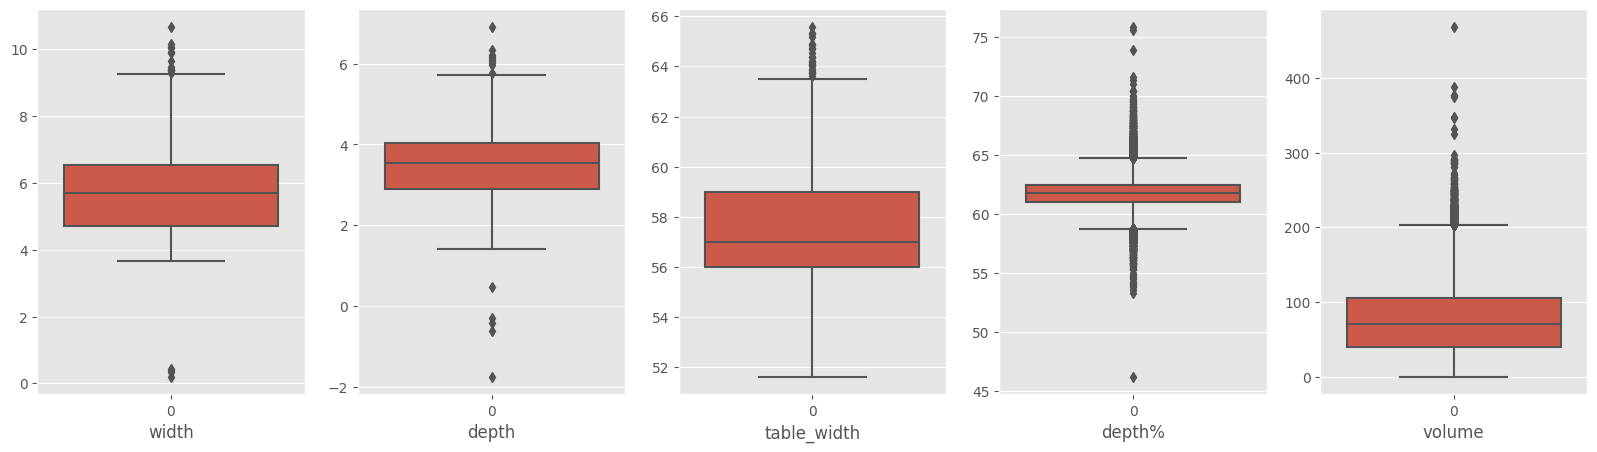

In [34]:
plt.figure(figsize=(20,5))

for i, col in enumerate(outliers_cols):

        ax = plt.subplot(1, 5, i+1)

        sns.boxplot(clean_df[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

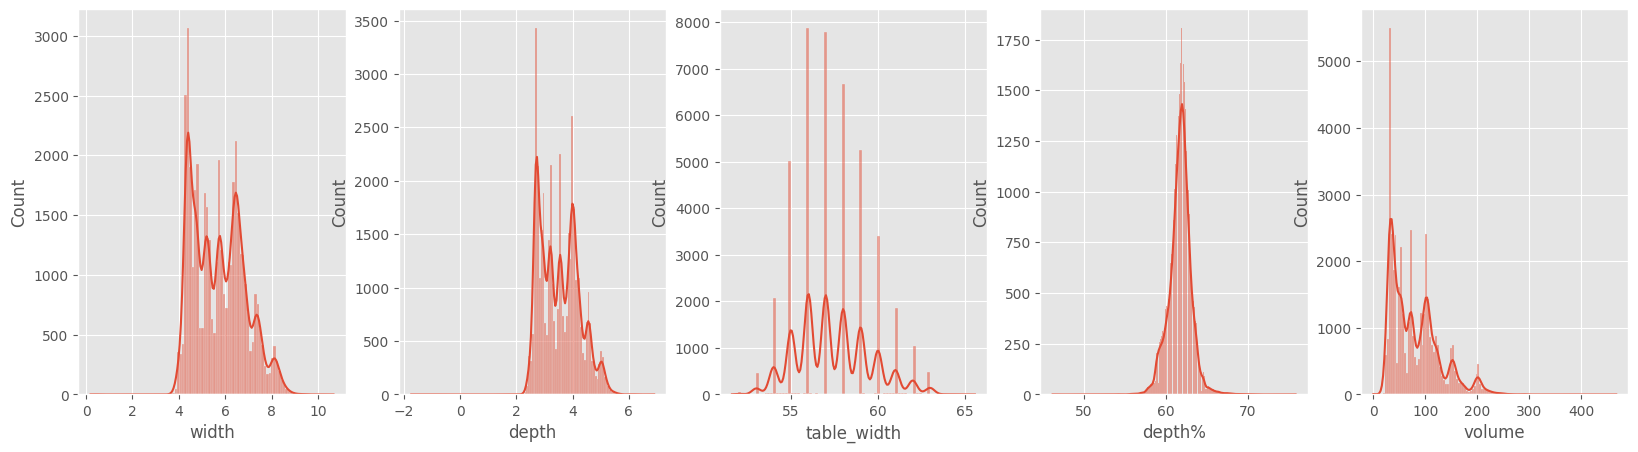

In [35]:
plt.figure(figsize=(20,5))

for i, col in enumerate(outliers_cols):

        ax = plt.subplot(1, 5, i+1)

        sns.histplot(clean_df[col] , ax=ax, kde=True)

        plt.xlabel(col)
        
plt.show()

In [36]:
pd.DataFrame([clean_df.select_dtypes(exclude='category').skew(),clean_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat    depth%  table_width     price    length     width  \
Skewness  1.108252  0.046281     0.381934  1.616706  0.379844  0.380378   
Kurtosis  1.215953  3.387487    -0.231140  2.169816 -0.642321 -0.676975   

             depth  cut_encoded  color_encoded  clarity_encoded    volume  
Skewness  0.361617    -0.719688      -0.193058         0.555213  1.056473  
Kurtosis -0.570779    -0.385666      -0.860217        -0.389368  0.939093

- **We can clearly notice the `iterativeImputer` changes in the `['width','depth','table_width','volume']` features, the outliers and features skewness is nearly gone.**

- **But not that much of a change in outlier on `'depth%'`.**


In [37]:
df_all = clean_df.copy()

df_all[['cut','color','clarity']] = df[['cut','color','clarity']] 

df = df_all.drop(columns=['cut_encoded','color_encoded','clarity_encoded'])

In [38]:
df

carat  depth%  table_width    price  length  width  depth      volume  \
0       1.06    61.8         57.0   4270.0    6.57   6.60   4.07  109.328340   
1       1.51    60.9         58.0  15164.0    7.38   7.42   4.51  150.923542   
2       0.32    61.3         56.0    828.0    4.43   4.41   2.71   32.387481   
3       0.53    61.2         56.0   1577.0    5.19   5.22   3.19   53.119242   
4       0.70    61.0         57.0   2596.0    5.76   5.72   3.50   70.070000   
...      ...     ...          ...      ...     ...    ...    ...         ...   
43147   0.52    61.5         56.0   1760.0    5.16   5.18   3.18   52.382232   
43148   0.72    62.1         59.0   3016.0    5.70   5.73   3.55   72.212325   
43149   0.44    61.5         58.0    990.0    4.95   4.87   3.02   44.416348   
43150   0.31    60.2         58.0    734.0    4.38   4.43   2.65   31.109675   
43151   0.33    61.2         55.0    743.0    4.49   4.46   2.74   33.483896   

             cut color clarity  
0          Ideal     I     SI2  
1        Premium     G    VVS2  
2          Ideal     F     VS2  
3          Ideal     G     VS2  
4        Premium     H    VVS2  
...          ...   ...     ...  
43147      Ideal     E     VS2  
43148  Very Good     D     VS2  
43149    Premium     I    VVS1  
43150    Premium     E     VS1  
43151      Ideal     G     VS2  

[43055 rows x 11 columns]

In [39]:
df.isna().sum()

carat          0
depth%         0
table_width    0
price          0
length         0
width          0
depth          0
volume         0
cut            0
color          0
clarity        0
dtype: int64

## **Applying Log Transformation**


> **To handle the Skewness in our Features**


In [40]:
pd.DataFrame([clean_df.select_dtypes(exclude='category').skew(),clean_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat    depth%  table_width     price    length     width  \
Skewness  1.108252  0.046281     0.381934  1.616706  0.379844  0.380378   
Kurtosis  1.215953  3.387487    -0.231140  2.169816 -0.642321 -0.676975   

             depth  cut_encoded  color_encoded  clarity_encoded    volume  
Skewness  0.361617    -0.719688      -0.193058         0.555213  1.056473  
Kurtosis -0.570779    -0.385666      -0.860217        -0.389368  0.939093

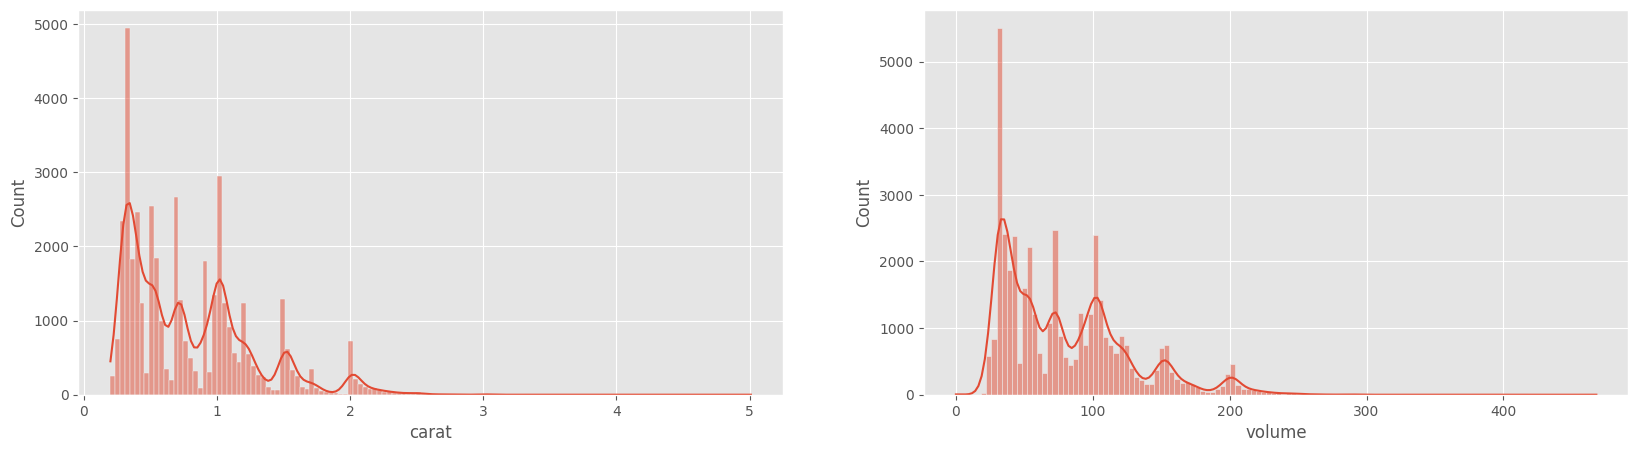

In [41]:
Skewed_Cols = clean_df[['carat','volume']].columns

plt.figure(figsize=(20,5))

for i, col in enumerate(clean_df[Skewed_Cols]):

        ax = plt.subplot(1, 2, i+1)

        sns.histplot(clean_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

In [42]:
trans_df = clean_df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

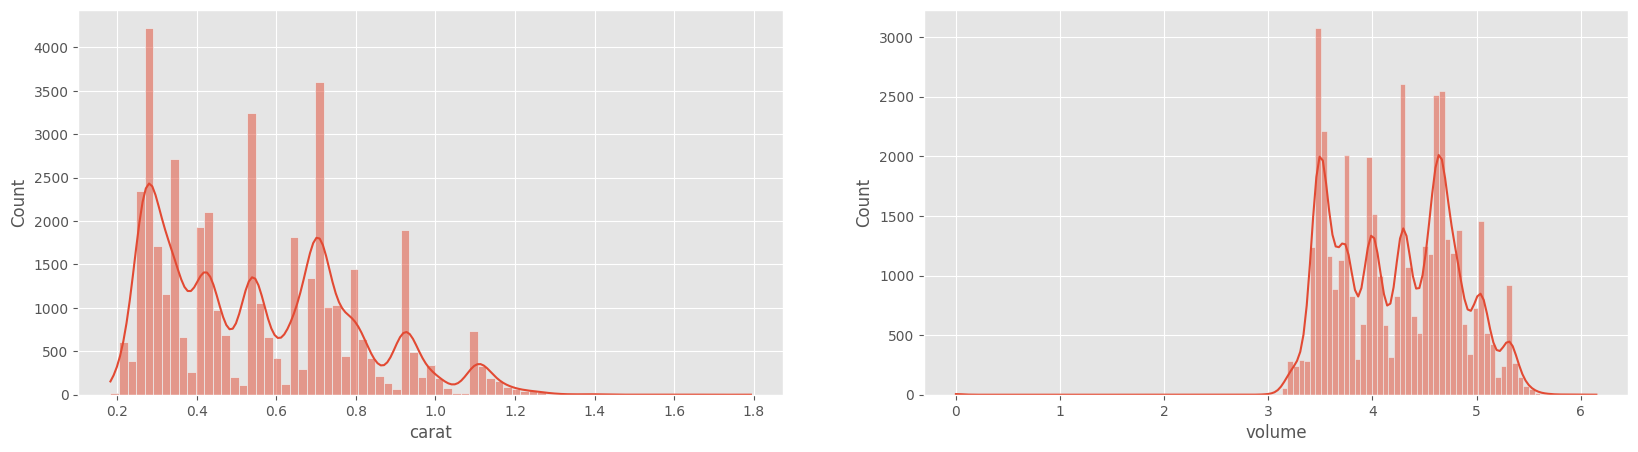

In [43]:
plt.figure(figsize=(20,5))

for i, col in enumerate(trans_df[Skewed_Cols]):

        ax = plt.subplot(1, 2, i+1)

        sns.histplot(trans_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

In [44]:
pd.DataFrame([trans_df.select_dtypes(exclude='category').skew(),trans_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat    depth%  table_width     price    length     width  \
Skewness  0.576664  0.046281     0.381934  1.616706  0.379844  0.380378   
Kurtosis -0.455557  3.387487    -0.231140  2.169816 -0.642321 -0.676975   

             depth  cut_encoded  color_encoded  clarity_encoded    volume  
Skewness  0.361617    -0.719688      -0.193058         0.555213 -0.053341  
Kurtosis -0.570779    -0.385666      -0.860217        -0.389368  0.012884

- **`['carat']` features didn't have siginificant changes unlike `['volume']` that has become more normally distributed.**


## **Polynomial Features**


-**Since we have only 10 features to predict our target we will try to make some new ones using `PolynomialFeatures`**

> **`PolynomialFeatures` Create new features consisting of all polynomial combinations of the features with specified degree.**


In [45]:
from sklearn.preprocessing import PolynomialFeatures

df_ploy = trans_df.drop(columns=['price']).copy()

poly = PolynomialFeatures(2)

ploy_data = poly.fit_transform(df_ploy)

df_ploy = pd.DataFrame(ploy_data, columns=poly.get_feature_names_out())

df_ploy

1     carat  depth%  table_width  length  width  depth  cut_encoded  \
0      1.0  0.722706    61.8         57.0    6.57   6.60   4.07          4.0   
1      1.0  0.920283    60.9         58.0    7.38   7.42   4.51          3.0   
2      1.0  0.277632    61.3         56.0    4.43   4.41   2.71          4.0   
3      1.0  0.425268    61.2         56.0    5.19   5.22   3.19          4.0   
4      1.0  0.530628    61.0         57.0    5.76   5.72   3.50          3.0   
...    ...       ...     ...          ...     ...    ...    ...          ...   
43050  1.0  0.418710    61.5         56.0    5.16   5.18   3.18          4.0   
43051  1.0  0.542324    62.1         59.0    5.70   5.73   3.55          2.0   
43052  1.0  0.364643    61.5         58.0    4.95   4.87   3.02          3.0   
43053  1.0  0.270027    60.2         58.0    4.38   4.43   2.65          3.0   
43054  1.0  0.285179    61.2         55.0    4.49   4.46   2.74          4.0   

       color_encoded  clarity_encoded  ...  cut_encoded^2  \
0                1.0              1.0  ...           16.0   
1                3.0              5.0  ...            9.0   
2                4.0              3.0  ...           16.0   
3                3.0              3.0  ...           16.0   
4                2.0              5.0  ...            9.0   
...              ...              ...  ...            ...   
43050            5.0              3.0  ...           16.0   
43051            6.0              3.0  ...            4.0   
43052            1.0              6.0  ...            9.0   
43053            5.0              4.0  ...            9.0   
43054            3.0              3.0  ...           16.0   

       cut_encoded color_encoded  cut_encoded clarity_encoded  \
0                            4.0                          4.0   
1                            9.0                         15.0   
2                           16.0                         12.0   
3                           12.0                         12.0   
4                            6.0                         15.0   
...                          ...                          ...   
43050                       20.0                         12.0   
43051                       12.0                          6.0   
43052                        3.0                         18.0   
43053                       15.0                         12.0   
43054                       12.0                         12.0   

       cut_encoded volume  color_encoded^2  color_encoded clarity_encoded  \
0               18.813843              1.0                            1.0   
1               15.070132              9.0                           15.0   
2               14.032724             16.0                           12.0   
3               15.964759              9.0                            9.0   
4               12.790996              4.0                           10.0   
...                   ...              ...                            ...   
43050           15.909912             25.0                           15.0   
43051            8.586728             36.0                           18.0   
43052           11.447616              1.0                            6.0   
43053           10.407472             25.0                           20.0   
43054           14.161970              9.0                            9.0   

       color_encoded volume  clarity_encoded^2  clarity_encoded volume  \
0                  4.703461                1.0                4.703461   
1                 15.070132               25.0               25.116887   
2                 14.032724                9.0               10.524543   
3                 11.973569                9.0               11.973569   
4                  8.527331               25.0               21.318327   
...                     ...                ...                     ...   
43050             19.887390                9.0               11.932434   
43051            

In [46]:
df_ploy.describe()

1         carat        depth%   table_width        length  \
count  43055.0  43055.000000  43055.000000  43055.000000  43055.000000   
mean       1.0      0.555289     61.756775     57.417492      5.731555   
std        0.0      0.244631      1.370869      2.106953      1.120732   
min        1.0      0.182322     46.194955     51.600000      0.000000   
25%        1.0      0.336472     61.000000     56.000000      4.710000   
50%        1.0      0.530628     61.800000     57.000000      5.700000   
75%        1.0      0.712950     62.500000     59.000000      6.540000   
max        1.0      1.793425     75.852693     65.577245     10.740000   

              width         depth   cut_encoded  color_encoded  \
count  43055.000000  43055.000000  43055.000000   43055.000000   
mean       5.733347      3.538506      2.904657       3.406178   
std        1.112341      0.691900      1.114915       1.701862   
min        0.194293     -1.748043      0.000000       0.000000   
25%        4.720000      2.910000      2.000000       2.000000   
50%        5.710000      3.530000      3.000000       3.000000   
75%        6.540000      4.040000      4.000000       5.000000   
max       10.670409      6.905782      4.000000       6.000000   

       clarity_encoded  ...  cut_encoded^2  cut_encoded color_encoded  \
count     43055.000000  ...   43055.000000               43055.000000   
mean          3.045453  ...       9.680037                   9.933155   
std           1.649152  ...       5.732048                   6.516406   
min           0.000000  ...       0.000000                   0.000000   
25%           2.000000  ...       4.000000                   4.000000   
50%           3.000000  ...       9.000000                   9.000000   
75%           4.000000  ...      16.000000                  15.000000   
max           7.000000  ...      16.000000                  24.000000   

       cut_encoded clarity_encoded  cut_encoded volume  color_encoded^2  \
count                 43055.000000        43055.000000     43055.000000   
mean                      9.193497           12.200482        14.498316   
std                       6.632807            4.860759        11.445941   
min                       0.000000            0.000000         0.000000   
25%                       4.000000            8.982289         4.000000   
50%                       8.000000           13.741282         9.000000   
75%                      12.000000           15.722395        25.000000   
max                      28.000000           23.222626        36.000000   

       color_encoded clarity_encoded  color_encoded volume  clarity_encoded^2  \
count                   43055.000000          43055.000000       43055.000000   
mean                       10.295413             14.167886          11.994426   
std                         7.668898              7.111749          11.964339   
min                         0.000000              0.000000           0.000000   
25%                         4.000000              9.321441           4.000000   
50%                         9.000000             14.149564           9.000000   
75%                        15.000000             19.396480          16.000000   
max                        42.000000             34.716428          49.000000   

       clarity_encoded volume      volume^2  
count            43055.000000  43055.000000  
mean                12.535584     18.246271  
std                  6.448457      4.869395  
min                  0.000000      0.000000  
25%                  7.898731     13.822691  
50%                 11.346596     18.301034  
75%                 17.099216     21.782359  
max                 37.903293     37.827326  

[8 rows x 66 columns]

- **A Degree of 2 to the `PolynomialFeatures`, Increased our 11 Features to 66 ones, we will see how our new ploy features will affect our predictions.**

## **Scaling Features**


> **Changes Values but keeps the features as the same distribution.**


In [47]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_ploy.copy()

Scaler = StandardScaler()

scaled_data = Scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns)

df_scaled

1     carat    depth%  table_width    length     width     depth  \
0      0.0  0.684374  0.031532    -0.198152  0.748131  0.779134  0.768175   
1      0.0  1.492037 -0.624994     0.276473  1.470882  1.516327  1.404113   
2      0.0 -1.135020 -0.333205    -0.672776 -1.161357 -1.189708 -1.197449   
3      0.0 -0.531507 -0.406152    -0.672776 -0.483221 -0.461506 -0.503699   
4      0.0 -0.100810 -0.552047    -0.198152  0.025381 -0.011999 -0.055653   
...    ...       ...       ...          ...       ...       ...       ...   
43050  0.0 -0.558312 -0.187310    -0.672776 -0.509989 -0.497467 -0.518152   
43051  0.0 -0.052998  0.250373     0.751097 -0.028156 -0.003009  0.016613   
43052  0.0 -0.779331 -0.187310     0.276473 -0.697369 -0.776162 -0.749402   
43053  0.0 -1.166106 -1.135625     0.276473 -1.205971 -1.171728 -1.284168   
43054  0.0 -1.104168 -0.406152    -1.147401 -1.107820 -1.144758 -1.154090   

       cut_encoded  color_encoded  clarity_encoded  ...  cut_encoded^2  \
0         0.982457      -1.413867        -1.240321  ...       1.102579   
1         0.085517      -0.238670         1.185197  ...      -0.118639   
2         0.982457       0.348929        -0.027562  ...       1.102579   
3         0.982457      -0.238670        -0.027562  ...       1.102579   
4         0.085517      -0.826268         1.185197  ...      -0.118639   
...            ...            ...              ...  ...            ...   
43050     0.982457       0.936527        -0.027562  ...       1.102579   
43051    -0.811423       1.524126        -0.027562  ...      -0.990938   
43052     0.085517      -1.413867         1.791576  ...      -0.118639   
43053     0.085517       0.936527         0.578817  ...      -0.118639   
43054     0.982457      -0.238670        -0.027562  ...       1.102579   

       cut_encoded color_encoded  cut_encoded clarity_encoded  \
0                      -0.910506                    -0.783010   
1                      -0.143203                     0.875432   
2                       0.931022                     0.423129   
3                       0.317179                     0.423129   
4                      -0.603584                     0.875432   
...                          ...                          ...   
43050                   1.544864                     0.423129   
43051                   0.317179                    -0.481475   
43052                  -1.063966                     1.327734   
43053                   0.777561                     0.423129   
43054                   0.317179                     0.423129   

       cut_encoded volume  color_encoded^2  color_encoded clarity_encoded  \
0                1.360577        -1.179324                      -1.212106   
1                0.590378        -0.480378                       0.613470   
2                0.376950         0.131199                       0.222275   
3                0.774431        -0.480378                      -0.168920   
4                0.121487        -0.917219                      -0.038521   
...                   ...              ...                            ...   
43050            0.763147         0.917514                       0.613470   
43051           -0.743463         1.878564                       1.004665   
43052           -0.154888        -1.179324                      -0.560115   
43053           -0.368879         0.917514                       1.265462   
43054            0.403540        -0.480378                      -0.168920   

       color_encoded volume  clarity_encoded^2  clarity_encoded volume  \
0                 -1.330831          -0.918944               -1.214587   
1                  0.126868           1.087041                1.951079   
2                 -0.019006          -0.250282               -0.311867   
3                 -0.308552          -0.250282               -0.087156   
4                 -0.793141           1.087041                1.362007   
...                     ...                ..

In [48]:
df_scaled.describe()

1         carat        depth%   table_width        length  \
count  43055.0  4.305500e+04  4.305500e+04  4.305500e+04  4.305500e+04   
mean       0.0 -4.548266e-16 -4.271302e-15  6.202541e-15  9.717049e-16   
std        0.0  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min        0.0 -1.524633e+00 -1.135193e+01 -2.761124e+00 -5.114176e+00   
25%        0.0 -8.944888e-01 -5.520469e-01 -6.727765e-01 -9.115171e-01   
50%        0.0 -1.008095e-01  3.153152e-02 -1.981520e-01 -2.815581e-02   
75%        0.0  6.444924e-01  5.421626e-01  7.510971e-01  7.213629e-01   
max        0.0  5.061304e+00  1.028259e+01  3.872819e+00  4.468956e+00   

              width         depth   cut_encoded  color_encoded  \
count  4.305500e+04  4.305500e+04  4.305500e+04   4.305500e+04   
mean   4.096080e-16 -5.408079e-16 -9.142740e-17   7.921508e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00   1.000012e+00   
min   -4.979692e+00 -7.640713e+00 -2.605303e+00  -2.001465e+00   
25%   -9.110138e-01 -9.083867e-01 -8.114229e-01  -8.262683e-01   
50%   -2.098890e-02 -1.229317e-02  8.551710e-02  -2.386697e-01   
75%    7.251936e-01  7.248160e-01  9.824572e-01   9.365275e-01   
max    4.438493e+00  4.866766e+00  9.824572e-01   1.524126e+00   

       clarity_encoded  ...  cut_encoded^2  cut_encoded color_encoded  \
count     4.305500e+04  ...   4.305500e+04               4.305500e+04   
mean     -7.195369e-17  ...  -1.221232e-16              -6.638388e-17   
std       1.000012e+00  ...   1.000012e+00               1.000012e+00   
min      -1.846700e+00  ...  -1.688777e+00              -1.524348e+00   
25%      -6.339414e-01  ...  -9.909379e-01              -9.105056e-01   
50%      -2.756206e-02  ...  -1.186391e-01              -1.432026e-01   
75%       5.788173e-01  ...   1.102579e+00               7.775610e-01   
max       2.397955e+00  ...   1.102579e+00               2.158706e+00   

       cut_encoded clarity_encoded  cut_encoded volume  color_encoded^2  \
count                 4.305500e+04        4.305500e+04     4.305500e+04   
mean                  1.274042e-16        2.642153e-16     7.261382e-18   
std                   1.000012e+00        1.000012e+00     1.000012e+00   
min                  -1.386080e+00       -2.510024e+00    -1.266692e+00   
25%                  -7.830105e-01       -6.620839e-01    -9.172193e-01   
50%                  -1.799405e-01        3.169912e-01    -4.803782e-01   
75%                   4.231295e-01        7.245687e-01     9.175136e-01   
max                   2.835409e+00        2.267603e+00     1.878564e+00   

       color_encoded clarity_encoded  color_encoded volume  clarity_encoded^2  \
count                   4.305500e+04          4.305500e+04       4.305500e+04   
mean                   -3.960754e-18          2.590993e-17       4.521861e-17   
std                     1.000012e+00          1.000012e+00       1.000012e+00   
min                    -1.342505e+00         -1.992203e+00      -1.002526e+00   
25%                    -8.209114e-01         -6.814780e-01      -6.681956e-01   
50%                    -1.689197e-01         -2.576239e-03      -2.502821e-01   
75%                     6.134704e-01          7.352137e-01       3.347967e-01   
max                     4.134226e+00          2.889413e+00       3.093025e+00   

       clarity_encoded volume      volume^2  
count            4.305500e+04  4.305500e+04  
mean            -2.673509e-17  6.396617e-16  
std              1.000012e+00  1.000012e+00  
min             -1.943989e+00 -3.747177e+00  
25%             -7.190723e-01 -9.084561e-01  
50%             -1.843855e-01  1.124663e-02  
75%              7.077174e-01  7.261948e-01  
max              3.933965e+00  4.021297e+00  

[8 rows x 66 columns]

In [49]:
org_df_scaled = trans_df.drop(columns=['price']).copy()

Scaler = StandardScaler()

scaled_data = Scaler.fit_transform(org_df_scaled)

org_df_scaled = pd.DataFrame(scaled_data, columns=org_df_scaled.columns)

org_df_scaled

carat    depth%  table_width    length     width     depth  \
0      0.684374  0.031532    -0.198152  0.748131  0.779134  0.768175   
1      1.492037 -0.624994     0.276473  1.470882  1.516327  1.404113   
2     -1.135020 -0.333205    -0.672776 -1.161357 -1.189708 -1.197449   
3     -0.531507 -0.406152    -0.672776 -0.483221 -0.461506 -0.503699   
4     -0.100810 -0.552047    -0.198152  0.025381 -0.011999 -0.055653   
...         ...       ...          ...       ...       ...       ...   
43050 -0.558312 -0.187310    -0.672776 -0.509989 -0.497467 -0.518152   
43051 -0.052998  0.250373     0.751097 -0.028156 -0.003009  0.016613   
43052 -0.779331 -0.187310     0.276473 -0.697369 -0.776162 -0.749402   
43053 -1.166106 -1.135625     0.276473 -1.205971 -1.171728 -1.284168   
43054 -1.104168 -0.406152    -1.147401 -1.107820 -1.144758 -1.154090   

       cut_encoded  color_encoded  clarity_encoded    volume  
0         0.982457      -1.413867        -1.240321  0.819193  
1         0.085517      -0.238670         1.185197  1.375941  
2         0.982457       0.348929        -0.027562 -1.260945  
3         0.982457      -0.238670        -0.027562 -0.420368  
4         0.085517      -0.826268         1.185197  0.053819  
...            ...            ...              ...       ...  
43050     0.982457       0.936527        -0.027562 -0.444231  
43051    -0.811423       1.524126        -0.027562  0.105503  
43052     0.085517      -1.413867         1.791576 -0.725472  
43053     0.085517       0.936527         0.578817 -1.328858  
43054     0.982457      -0.238670        -0.027562 -1.204714  

[43055 rows x 10 columns]

## **Clustering with K-Means**


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

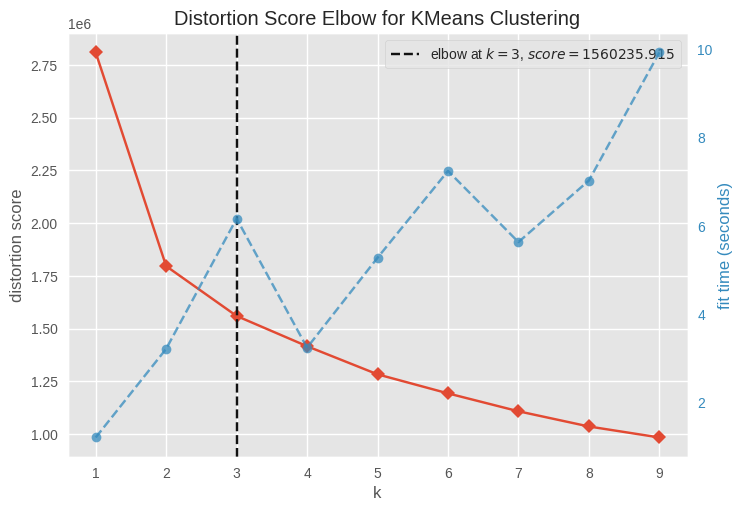

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

In [ ]:
kmeans = KMeans(2, random_state=0, n_init = 10)

labels = kmeans.fit_predict(df_scaled)

print("Silhouette Score for 2 Clusters", silhouette_score(df_scaled, labels))

Silhouette Score for 2 Clusters 0.31742101787346866


In [ ]:
kmeans = KMeans(3, random_state=0, n_init = 10)

labels = kmeans.fit_predict(df_scaled)

print("Silhouette Score for 3 Clusters", silhouette_score(df_scaled, labels))

Silhouette Score for 3 Clusters 0.23129460996706822


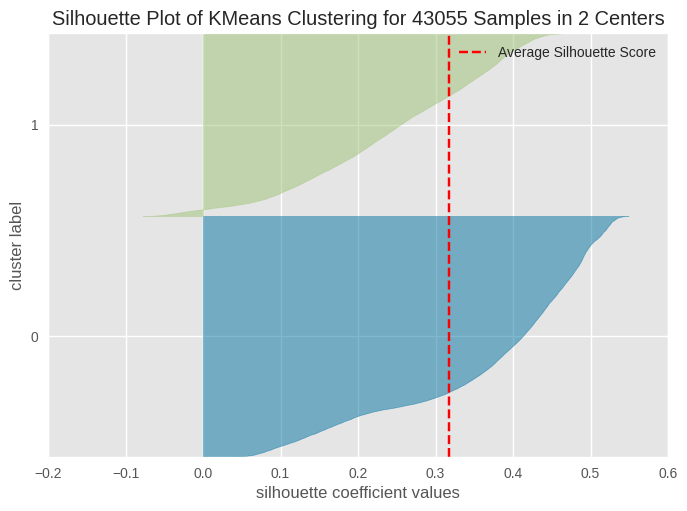

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43055 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init = 10)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

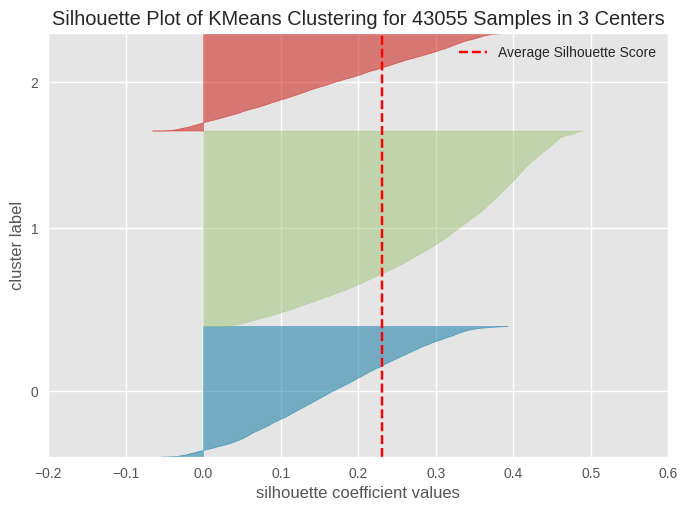

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43055 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init = 10)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

- **Based on the Elbow Method and Silhouette Score, Seems Like Diamonds would be better grouped to 2 Clusters.**


In [51]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)

df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

df_scaled.head()

1     carat    depth%  table_width    length     width     depth  \
0  0.0  0.684374  0.031532    -0.198152  0.748131  0.779134  0.768175   
1  0.0  1.492037 -0.624994     0.276473  1.470882  1.516327  1.404113   
2  0.0 -1.135020 -0.333205    -0.672776 -1.161357 -1.189708 -1.197449   
3  0.0 -0.531507 -0.406152    -0.672776 -0.483221 -0.461506 -0.503699   
4  0.0 -0.100810 -0.552047    -0.198152  0.025381 -0.011999 -0.055653   

   cut_encoded  color_encoded  clarity_encoded  ...  \
0     0.982457      -1.413867        -1.240321  ...   
1     0.085517      -0.238670         1.185197  ...   
2     0.982457       0.348929        -0.027562  ...   
3     0.982457      -0.238670        -0.027562  ...   
4     0.085517      -0.826268         1.185197  ...   

   cut_encoded color_encoded  cut_encoded clarity_encoded  cut_encoded volume  \
0                  -0.910506                    -0.783010            1.360577   
1                  -0.143203                     0.875432            0.590378   
2                   0.931022                     0.423129            0.376950   
3                   0.317179                     0.423129            0.774431   
4                  -0.603584                     0.875432            0.121487   

   color_encoded^2  color_encoded clarity_encoded  color_encoded volume  \
0        -1.179324                      -1.212106             -1.330831   
1        -0.480378                       0.613470              0.126868   
2         0.131199                       0.222275             -0.019006   
3        -0.480378                      -0.168920             -0.308552   
4        -0.917219                      -0.038521             -0.793141   

   clarity_encoded^2  clarity_encoded volume  volume^2  Cluster  
0          -0.918944               -1.214587  0.796057        1  
1           1.087041                1.951079  1.435113        1  
2          -0.250282               -0.311867 -1.219660        0  
3          -0.250282               -0.087156 -0.475768        0  
4           1.087041                1.362007 -0.013848        0  

[5 rows x 67 columns]

## **Making Preproessing Pipeline**


- **We will make a pipelines for encoding categorical features and scaling for the numerical ones along with transforming skewed features, creating new cluster feature and generating poly features.**


In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans


# this custom ClustersTransformer clusters the features and make new cluster feature before training the model
class ClustersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, n_init=10, random_state=0):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_init = n_init
        
    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init=self.n_init, random_state=self.random_state)
        self.kmeans.fit(X)
        return self
        
    def transform(self, X, y=None):
        clusters = self.kmeans.predict(X)
        clusters = clusters.reshape(-1, 1)
        X = np.concatenate((X, clusters), axis=1)
        return X

In [53]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PowerTransformer

catCols_pipeline = make_pipeline(OrdinalEncoder(categories=cat_orders))

skewedCols_pipeline = make_pipeline(PowerTransformer(copy=False))

numCols_pipeline = make_pipeline(PolynomialFeatures(2), StandardScaler())

clustering_pipeline = make_pipeline(ClustersTransformer(n_clusters=2))

In [54]:
skew_cols = ['carat','volume']

cat_cols = ['cut','color','clarity']

features_pipeline = ColumnTransformer([
    ('cat_features', catCols_pipeline, cat_cols),
    ('skew_features', skewedCols_pipeline, skew_cols),] , remainder='passthrough')

In [55]:
features_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_features',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 ['cut', 'color', 'clarity']),
                                ('skew_features',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer(copy=False))]),
                                 ['carat', 'volume'])])

In [56]:
preprocessing_pipeline = make_pipeline(
    features_pipeline,
    numCols_pipeline,
    clustering_pipeline,
)
preprocessing_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_features',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Premium',
                                                                                               'Ideal'],
                                                                                              ['J',
                                                                                               'I',
                                                                                               'H',
                                                                                               'G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D'],
                                                                                              ['I1',
                                                                                               'SI2',
                                                                                               'SI1',
                                                                                               'VS2',
                                                                                               'VS1',
                                                                                               'VVS2',
                                                                                               'VVS1',
                                                                                               'IF']]))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('skew_features',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(copy=False))]),
                                                  ['carat', 'volume'])])),
                ('pipeline-1',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('standardscaler', StandardScaler())])),
                ('pipeline-2',
                 Pipeline(steps=[('clusterstransformer',
                                  ClustersTransformer())]))])

In [57]:
preprocessing_pipeline.fit_transform(df.drop(columns='price'))

pipeline_features_names = list(preprocessing_pipeline[-2].get_feature_names_out())
pipeline_features_names.append('Cluster')

pd.DataFrame(preprocessing_pipeline.fit_transform(df.drop(columns='price')), columns= pipeline_features_names)

1        x0        x1        x2        x3        x4        x5  \
0      0.0  0.982457 -1.413867 -1.240321  0.796708  0.816414  0.031532   
1      0.0  0.085517 -0.238670  1.185197  1.402914  1.384594 -0.624994   
2      0.0  0.982457  0.348929 -0.027562 -1.261797 -1.255961 -0.333205   
3      0.0  0.982457 -0.238670 -0.027562 -0.449320 -0.428004 -0.406152   
4      0.0  0.085517 -0.826268  1.185197  0.045653  0.044711 -0.552047   
...    ...       ...       ...       ...       ...       ...       ...   
43050  0.0  0.982457  0.936527 -0.027562 -0.482326 -0.451685 -0.187310   
43051  0.0 -0.811423  1.524126 -0.027562  0.096702  0.096483  0.250373   
43052  0.0  0.085517 -1.413867  1.791576 -0.764987 -0.730001 -0.187310   
43053  0.0  0.085517  0.936527  0.578817 -1.307829 -1.322299 -1.135625   
43054  0.0  0.982457 -0.238670 -0.027562 -1.216540 -1.200970 -0.406152   

             x6        x7        x8  ...     x6 x7     x6 x8     x6 x9  \
0     -0.198152  0.748131  0.779134  ...  0.660247  0.689651  0.685932   
1      0.276473  1.470882  1.516327  ...  1.447338  1.492143  1.396040   
2     -0.672776 -1.161357 -1.189708  ... -1.197760 -1.225307 -1.239449   
3     -0.672776 -0.483221 -0.461506  ... -0.572202 -0.553204 -0.594376   
4     -0.198152  0.025381 -0.011999  ... -0.018372 -0.053573 -0.093772   
...         ...       ...       ...  ...       ...       ...       ...   
43050 -0.672776 -0.509989 -0.497467  ... -0.596895 -0.586395 -0.607815   
43051  0.751097 -0.028156 -0.003009  ...  0.098920  0.124676  0.145011   
43052  0.276473 -0.697369 -0.776162  ... -0.624234 -0.699301 -0.677890   
43053  0.276473 -1.205971 -1.171728  ... -1.110159 -1.077432 -1.192892   
43054 -1.147401 -1.107820 -1.144758  ... -1.214369 -1.249903 -1.264887   

           x7^2     x7 x8     x7 x9      x8^2     x8 x9      x9^2  Cluster  
0      0.676203  0.693919  0.690822  0.710991  0.708353  0.699203      0.0  
1      1.519724  1.548335  1.485185  1.575813  1.512889  1.439599      0.0  
2     -1.081086 -1.092164 -1.097806 -1.102839 -1.108671 -1.109189      1.0  
3     -0.535296 -0.525769 -0.545386 -0.516057 -0.535849 -0.553774      1.0  
4     -0.069361 -0.086822 -0.107910 -0.104574 -0.125405 -0.147039      1.0  
...         ...       ...       ...       ...       ...       ...      ...  
43050 -0.558475 -0.552981 -0.563267 -0.547351 -0.557711 -0.566267      1.0  
43051 -0.120691 -0.108277 -0.098805 -0.095960 -0.086227 -0.077906      1.0  
43052 -0.716967 -0.749561 -0.740471 -0.781716 -0.772791 -0.760819      1.0  
43053 -1.113970 -1.102127 -1.146156 -1.089539 -1.134456 -1.172261      1.0  
43054 -1.041132 -1.055499 -1.061717 -1.069476 -1.075854 -1.077123      1.0  

[43055 rows x 67 columns]

In [58]:
df_scaled

1     carat    depth%  table_width    length     width     depth  \
0      0.0  0.684374  0.031532    -0.198152  0.748131  0.779134  0.768175   
1      0.0  1.492037 -0.624994     0.276473  1.470882  1.516327  1.404113   
2      0.0 -1.135020 -0.333205    -0.672776 -1.161357 -1.189708 -1.197449   
3      0.0 -0.531507 -0.406152    -0.672776 -0.483221 -0.461506 -0.503699   
4      0.0 -0.100810 -0.552047    -0.198152  0.025381 -0.011999 -0.055653   
...    ...       ...       ...          ...       ...       ...       ...   
43050  0.0 -0.558312 -0.187310    -0.672776 -0.509989 -0.497467 -0.518152   
43051  0.0 -0.052998  0.250373     0.751097 -0.028156 -0.003009  0.016613   
43052  0.0 -0.779331 -0.187310     0.276473 -0.697369 -0.776162 -0.749402   
43053  0.0 -1.166106 -1.135625     0.276473 -1.205971 -1.171728 -1.284168   
43054  0.0 -1.104168 -0.406152    -1.147401 -1.107820 -1.144758 -1.154090   

       cut_encoded  color_encoded  clarity_encoded  ...  \
0         0.982457      -1.413867        -1.240321  ...   
1         0.085517      -0.238670         1.185197  ...   
2         0.982457       0.348929        -0.027562  ...   
3         0.982457      -0.238670        -0.027562  ...   
4         0.085517      -0.826268         1.185197  ...   
...            ...            ...              ...  ...   
43050     0.982457       0.936527        -0.027562  ...   
43051    -0.811423       1.524126        -0.027562  ...   
43052     0.085517      -1.413867         1.791576  ...   
43053     0.085517       0.936527         0.578817  ...   
43054     0.982457      -0.238670        -0.027562  ...   

       cut_encoded color_encoded  cut_encoded clarity_encoded  \
0                      -0.910506                    -0.783010   
1                      -0.143203                     0.875432   
2                       0.931022                     0.423129   
3                       0.317179                     0.423129   
4                      -0.603584                     0.875432   
...                          ...                          ...   
43050                   1.544864                     0.423129   
43051                   0.317179                    -0.481475   
43052                  -1.063966                     1.327734   
43053                   0.777561                     0.423129   
43054                   0.317179                     0.423129   

       cut_encoded volume  color_encoded^2  color_encoded clarity_encoded  \
0                1.360577        -1.179324                      -1.212106   
1                0.590378        -0.480378                       0.613470   
2                0.376950         0.131199                       0.222275   
3                0.774431        -0.480378                      -0.168920   
4                0.121487        -0.917219                      -0.038521   
...                   ...              ...                            ...   
43050            0.763147         0.917514                       0.613470   
43051           -0.743463         1.878564                       1.004665   
43052           -0.154888        -1.179324                      -0.560115   
43053           -0.368879         0.917514                       1.265462   
43054            0.403540        -0.480378                      -0.168920   

       color_encoded volume  clarity_encoded^2  clarity_encoded volume  \
0                 -1.330831          -0.918944               -1.214587   
1                  0.126868           1.087041                1.951079   
2                 -0.019006          -0.250282               -0.311867   
3                 -0.308552          -0.250282               -0.087156   
4                 -0.793141           1.087041                1.362007   
...                     ...                ...                     ...   
43050              0.804242          -0.250282               -0.093535   
43051              1.630039          -0.250282                0.053425   
430

- **As we can see our pipeline give same results to the steps we applied through data preprcoessing.**


# **Modeling**


## **Splitting Data**


In [59]:
from sklearn.model_selection import train_test_split

train_df = df.copy()

X_Org = train_df.drop(columns='price')

y_Org = train_df['price']

X_trainOrg, X_testOrg, y_trainOrg, y_testOrg = train_test_split(X_Org, y_Org, test_size=0.1, random_state=0)

print(X_trainOrg.shape, y_trainOrg.shape)
print(X_testOrg.shape, y_testOrg.shape)

(38749, 10) (38749,)
(4306, 10) (4306,)


In [60]:
train_df = df_scaled.copy()

X = train_df

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38749, 67) (38749,)
(4306, 67) (4306,)


> **Selecting Metrics**


In [61]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

def test_performence(model, modeling_pipeline, cv=3):
    
    # Training Set Performance
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_pred_train, y_train)
    mse_train = mean_squared_error(y_pred_train, y_train)
    rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)

    model_train_df = pd.DataFrame({'R2': round(r2_train,2),'MSE': round(mse_train,2),'RMSE': round(rmse_train,2)}, index= ['Model Train']).T
    
    # Training Set Performance
    y_pred_trainOrg = modeling_pipeline.predict(X_trainOrg)
    r2_train = r2_score(y_pred_trainOrg, y_trainOrg)
    mse_train = mean_squared_error(y_pred_trainOrg, y_trainOrg)
    rmse_train = mean_squared_error(y_pred_trainOrg, y_trainOrg, squared=False)

    pipeline_train_df = pd.DataFrame({'R2': round(r2_train,2) ,'MSE': round(mse_train,2)  ,'RMSE': round(rmse_train,2)}, index= ['Pipeline Train']).T
    
    
    # Testing Set Performance
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_pred_test, y_test)
    mse_test = mean_squared_error(y_pred_test, y_test)
    rmse_test = mean_squared_error(y_pred_test, y_test, squared=False)

    model_test_df = pd.DataFrame({'R2': round(r2_test,2),'MSE': round(mse_test,2) ,'RMSE': round(rmse_test,2)}, index= ['Model Test']).T
    
    # Testing Set Performance
    y_pred_testOrg = modeling_pipeline.predict(X_testOrg)
    r2_test = r2_score(y_pred_testOrg, y_testOrg)
    mse_test = mean_squared_error(y_pred_testOrg, y_testOrg)
    rmse_test = mean_squared_error(y_pred_testOrg, y_testOrg, squared=False)

    pipeline_test_df = pd.DataFrame({'R2': round(r2_test,2),'MSE': round(mse_test,2) ,'RMSE': round(rmse_test,2)}, index= ['Pipeline Test']).T

    results_df = pd.concat([model_train_df,pipeline_train_df,model_test_df,pipeline_test_df], axis=1)
    display(results_df.style.background_gradient(cmap='YlOrRd', axis=1))

    model_rmses = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=cv)

    pipeline_rmses = -cross_val_score(modeling_pipeline, X_Org, y_Org, scoring="neg_root_mean_squared_error", cv=cv)

    cv_scores_df = pd.DataFrame([pd.Series(model_rmses).describe().T, pd.Series(pipeline_rmses).describe().T], index=['Model','Pipeline']).T
    display(cv_scores_df.style.background_gradient(cmap='BuPu', axis=0))

## **Feature Importance**


In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0)

clf.fit(X_train,y_train)

print("Random Forest Test Set R2 Score: " , clf.score(X_test,y_test), "\n" )

Random Forest Test Set R2 Score:  0.9819698291322786 



In [ ]:
results = list(zip(X, clf.feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [ ]:
from xgboost import XGBRegressor

clf = XGBRegressor(random_state=0)

clf.fit(X_train,y_train)

print("XGB Test Set R2 Score: " , clf.score(X_test,y_test), "\n" )

XGB Test Set R2 Score:  0.980702117385373 



In [ ]:
results = list(zip(X, clf.feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

- **When it comes for predictions looks like the `['carat','width']` feautres are the most important ones.**


## **Traditional Models**


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LinearRegression()
)

lr_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(lr_model, modeling_pipeline)

In [ ]:
from sklearn.svm import LinearSVR

svm_model = LinearSVR()

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LinearSVR()
)

svm_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(svm_model, modeling_pipeline)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(5)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    KNeighborsRegressor(5)
)

knn_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(knn_model, modeling_pipeline)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    DecisionTreeRegressor(random_state=0)
)

dt_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(dt_model, modeling_pipeline)

## **Boostings and Ensemble Models**


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gd_model = GradientBoostingRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    GradientBoostingRegressor(random_state=0)
)

gd_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(gd_model, modeling_pipeline)

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    BaggingRegressor(random_state=0)
)

bagging_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(bagging_model, modeling_pipeline)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    RandomForestRegressor(random_state=0)
)

rf_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(rf_model, modeling_pipeline)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extrees_model = ExtraTreesRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    ExtraTreesRegressor(random_state=0)
)

extrees_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(extrees_model, modeling_pipeline)

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    XGBRegressor(random_state=0)
)

xgb_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(xgb_model, modeling_pipeline)

In [ ]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LGBMRegressor(random_state=0)
)

lgb_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(lgb_model, modeling_pipeline)

In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(random_state=0, verbose=False)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    CatBoostRegressor(random_state=0, verbose=False)
)

cat_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(cat_model, modeling_pipeline)

In [ ]:
from sklearn.ensemble import VotingRegressor

estimators = [('cat1', CatBoostRegressor(random_state=0, verbose=False)),
              ('lgbm1', LGBMRegressor(random_state=0)),
              ('xgb1', XGBRegressor(random_state=0)),
              ('extrees', ExtraTreesRegressor(random_state=0)),]

voting_model = VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)


modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)
)

voting_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(voting_model, modeling_pipeline)

In [ ]:
estimators = [('cat1', CatBoostRegressor(random_state=0, verbose=False)),
              ('lgbm1', LGBMRegressor(random_state=0)),
              ('xgb1', XGBRegressor(random_state=0)),
              ('extrees', ExtraTreesRegressor(random_state=0)),
              ('rf', RandomForestRegressor(random_state=0)),]

voting_model = VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)


modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)
)

voting_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(voting_model, modeling_pipeline)

- **We can notice that the `CatBoostRegressor` is giving best results along with `LGBMRegressor`, `XGBRegressor`, `ExtraTreesRegressor` and `RandomForestRegressor` , we will fine-tune them to get better scores.**


# **Fine-Tuning Models**


## **ExtraTrees Fine-Tuning**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [ { 'n_estimators': [100,500,1000], 'max_depth' : [5,10,None],
                'max_features' : ['sqrt','log2','auto']}]

extrees_reg = ExtraTreesRegressor(random_state=0)

extrees_grid_search = GridSearchCV(extrees_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

extrees_grid_search.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, None],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [100, 500, 1000]}],
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
extrees_grid_search.best_score_

-549.8636392999907

In [ ]:
extrees_grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 1000}

## **XGBoost Fine-Tuning**


In [ ]:
from xgboost import XGBRegressor

param_grid = [
 {'n_estimators': [100,500,1000], 'max_depth': [5,10,None], 'min_samples_split' : [2, 4] ,
  'max_features' : ['sqrt','log2']},
 ]

xgb_reg = XGBRegressor(random_state=0)

xgb_grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1, n_jobs=-1)

xgb_grid_search.fit(X, y)

In [ ]:
xgb_grid_search.best_score_

-550.016215104578

In [ ]:
xgb_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

## **LightGBM Fine-Tuning**


In [ ]:
param_grid = [
 {'num_leaves': [15, 20, 30], 'learning_rate' : [0.01, 0.1] ,
  'n_estimators' : [1000, 3000, 5000]},]

lgbm_reg = LGBMRegressor(random_state=0)

lgbm_grid_search = GridSearchCV(lgbm_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1, n_jobs=-1)

lgbm_grid_search.fit(X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'n_estimators': [1000, 3000, 5000],
                          'num_leaves': [15, 20, 30]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
lgbm_grid_search.best_score_

-535.9533327835229

In [ ]:
lgbm_grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 3000, 'num_leaves': 20}

## **CatBoost Fine-Tuning**


In [ ]:
param_grid = {'max_depth': [5,10,20],'n_estimators':[100, 300, 500]}

cat_reg = CatBoostRegressor(random_state=0, verbose=False)

cat_grid_search = GridSearchCV(cat_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1, n_jobs=-1)

cat_grid_search.fit(X, y)

In [65]:
cat_grid_search.best_score_

-535.4681365340003

In [66]:
cat_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 500}

## **Voting Regressor with Best Models**


In [67]:
from sklearn.ensemble import VotingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [69]:
cat_model = CatBoostRegressor(random_state=0, verbose=False, max_depth=5, n_estimators=500)

lgb_model = LGBMRegressor(random_state=0, learning_rate = 0.01, n_estimators = 3000, num_leaves = 20)

xgb_model = XGBRegressor(random_state=0, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)

extrees_model = ExtraTreesRegressor(random_state=0, n_estimators = 1000, max_features = 'auto')

In [70]:
estimators = [('cat', cat_model),
              ('lgbm', lgb_model),
              ('xgb', xgb_model),
              ('extrees', extrees_model),]

voting_model = VotingRegressor(estimators=estimators)


modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    VotingRegressor(estimators=estimators)
)

# **Making Submission**


In [78]:
modeling_pipeline.fit(X_Org, y_Org)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat_features',
                                                                   Pipeline(steps=[('ordinalencoder',
                                                                                    OrdinalEncoder(categories=[['Fair',
                                                                                                                'Good',
                                                                                                                'Very '
                                                                                                                'Good',
                                                                                                                'Premium',
                                                                                                                'Ideal'],
                                                                                                               ['J',
                                                                                                                'I',
                                                                                                                'H',
                                                                                                                'G',
                                                                                                                'F',
                                                                                                                'E',
                                                                                                                'D'],
                                                                                                               ['I1',
                                                                                                                'SI2',
                                                                                                                'SI1',
                                                                                                                'VS2',
                                                                                                                'VS1',
                                                                                                                'VVS2',
                                                                                                                'VVS1',
                                                                                                                'IF']]))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clar...
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_features='sqrt',
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           min_samples_split=2,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                    

In [72]:
test_comp_df = pd.read_csv('/content/Datasets/test.csv')

test_comp_df

Id  carat        cut color clarity  depth  table     x     y     z
0          1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1          2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2          3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3          4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4          5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
10783  10784   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26
10784  10785   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02
10785  10786   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55
10786  10787   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07
10787  10788   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92

[10788 rows x 10 columns]

In [73]:
test_comp_df.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth%', 'z':'depth','table':'table_width'}, inplace=True)

test_comp_df

Id  carat        cut color clarity  depth%  table_width  length  \
0          1   0.34      Ideal     G    VVS2    61.1         57.0    4.52   
1          2   0.71    Premium     E     VS2    62.7         58.0    5.74   
2          3   0.44  Very Good     I     VS1    62.8         56.0    4.83   
3          4   0.81    Premium     E     SI2    60.1         59.0    6.09   
4          5   0.40      Ideal     G    VVS1    61.2         56.0    4.74   
...      ...    ...        ...   ...     ...     ...          ...     ...   
10783  10784   0.57      Ideal     H     VS1    60.9         56.0    5.34   
10784  10785   1.05      Ideal     G     VS2    60.8         57.0    6.65   
10785  10786   0.71      Ideal     E    VVS1    62.3         55.0    5.68   
10786  10787   1.11    Premium     E     SI2    61.0         60.0    6.68   
10787  10788   2.00    Premium     F     SI2    61.5         59.0    8.03   

       width  depth  
0       4.48   2.75  
1       5.68   3.58  
2       4.88   3.05  
3       6.03   3.65  
4       4.80   2.92  
...      ...    ...  
10783   5.36   3.26  
10784   6.58   4.02  
10785   5.72   3.55  
10786   6.66   4.07  
10787   7.95   4.92  

[10788 rows x 10 columns]

In [74]:
test_comp_df['volume'] = test_comp_df['depth'] * test_comp_df['width'] * test_comp_df['depth']

test_comp_df

Id  carat        cut color clarity  depth%  table_width  length  \
0          1   0.34      Ideal     G    VVS2    61.1         57.0    4.52   
1          2   0.71    Premium     E     VS2    62.7         58.0    5.74   
2          3   0.44  Very Good     I     VS1    62.8         56.0    4.83   
3          4   0.81    Premium     E     SI2    60.1         59.0    6.09   
4          5   0.40      Ideal     G    VVS1    61.2         56.0    4.74   
...      ...    ...        ...   ...     ...     ...          ...     ...   
10783  10784   0.57      Ideal     H     VS1    60.9         56.0    5.34   
10784  10785   1.05      Ideal     G     VS2    60.8         57.0    6.65   
10785  10786   0.71      Ideal     E    VVS1    62.3         55.0    5.68   
10786  10787   1.11    Premium     E     SI2    61.0         60.0    6.68   
10787  10788   2.00    Premium     F     SI2    61.5         59.0    8.03   

       width  depth      volume  
0       4.48   2.75   33.880000  
1       5.68   3.58   72.797152  
2       4.88   3.05   45.396200  
3       6.03   3.65   80.334675  
4       4.80   2.92   40.926720  
...      ...    ...         ...  
10783   5.36   3.26   56.963936  
10784   6.58   4.02  106.335432  
10785   5.72   3.55   72.086300  
10786   6.66   4.07  110.322234  
10787   7.95   4.92  192.440880  

[10788 rows x 11 columns]

In [75]:
comp_pred = modeling_pipeline.predict(test_comp_df.drop(columns='Id'))

In [76]:
sub = pd.DataFrame({'Id': test_comp_df['Id'], 'price':comp_pred })

sub

Id         price
0          1    902.164860
1          2   2887.501434
2          3    851.441670
3          4   2734.487952
4          5   1134.086320
...      ...           ...
10783  10784   1741.596196
10784  10785   6703.383416
10785  10786   4648.921056
10786  10787   4620.693782
10787  10788  13818.408365

[10788 rows x 2 columns]

In [77]:
sub.to_csv('sub.csv',index=False)